In [1]:
import pandas as pd
import os, os.path
import h5py
import matplotlib
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.io.idl import readsav
from astropy.io import fits
from matplotlib import rcParams, cycler
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from time import gmtime, strftime
from datetime import datetime
from tempfile import TemporaryFile
import os
from scipy.optimize import curve_fit
from matplotlib import gridspec

In [2]:
import pandas as pd
import os, os.path
import h5py
import matplotlib
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.io.idl import readsav
from astropy.io import fits
from matplotlib import rcParams, cycler
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from time import gmtime, strftime
from datetime import datetime
from tempfile import TemporaryFile
import os
from scipy.optimize import curve_fit
from matplotlib import gridspec


In [3]:
run = 'run_21_mse' ## to save plots for different runs

In [4]:
df_res_train = pd.read_csv('results/Vrad_v1_cnn_rave_train_False_phot_mse_ex_filt.csv')
df_res_test = pd.read_csv('results/Vrad_v1_cnn_rave_test_False_phot_mse_ex_filt.csv')
df_res_obs = pd.read_csv('results/Vrad_v1_cnn_rave_obs_False_phot_mse_ex_filt.csv')

In [5]:
Vrad_train = pd.read_csv("Data/large_observed_sample_rave_with_Vrad_cnn_SN_0-50.csv")

In [6]:
Vrad_min_train = min(df_res_train.Vrad)
Vrad_max_train = max(df_res_train.Vrad)

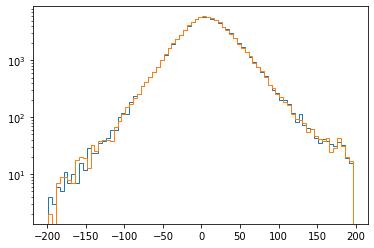

In [7]:
plt.hist(df_res_train.Vrad_ref, bins=np.arange(Vrad_min_train, Vrad_max_train, 5), histtype="step", log=True);
plt.hist(df_res_train.Vrad,     bins=np.arange(Vrad_min_train, Vrad_max_train, 5), histtype="step", log=True);

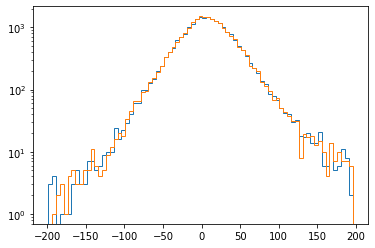

In [8]:
plt.hist(df_res_test.Vrad_ref, bins=np.arange(Vrad_min_train, Vrad_max_train, 5), histtype="step", log=True);
plt.hist(df_res_test.Vrad,     bins=np.arange(Vrad_min_train, Vrad_max_train, 5), histtype="step", log=True);

In [9]:
df_res_train['RAVE_OBS_ID'] = df_res_train['RAVE_OBS_ID'].astype(str)
df_res_test['RAVE_OBS_ID'] = df_res_test['RAVE_OBS_ID'].astype(str)

In [10]:
gaia_edr3 = pd.read_csv("Data/dr6_x_gaiaedr3_s.csv")

In [11]:
## reading observed sample and adding Vrad predicted by cnn
## observed sample has data between SNR_med_SPARV >0 and SNR_med_SPARV<60 whereas training set has data SNR_med_SPARV>70

alle = pd.read_csv("Data/large_observed_sample_rave_with_Vrad_cnn_SN_0-50.csv")

In [12]:
## variable alle containing the information of observed sample.
## we try to match the Vrad_cnn predicted by CNN with the gaia_edr3 data
## gaia_edr3 contains radial velocities in column 'dr2_radial_velocity' and error in column 'dr2_radial_velocity_error'

obs_merged_with_gaia_no_phot = pd.merge(alle, gaia_edr3, left_on = alle['RAVE_OBS_ID'].str.lower(), right_on = gaia_edr3['rave_obs_id'].str.lower(), how ="left")

where_good_gaia = (obs_merged_with_gaia_no_phot.dr2_radial_velocity > -500.0) & (obs_merged_with_gaia_no_phot.dr2_radial_velocity < +500.0)


obs_merged_with_gaia_no_phot = obs_merged_with_gaia_no_phot[where_good_gaia]
obs_merged_with_gaia_no_phot.shape

(285011, 26)

In [13]:
#RAVE amopsheric parameters
bdasp = pd.read_csv("../RAVE/tmp/DR6_BDASP.csv")

In [14]:
obs_merged_with_gaia = pd.merge(obs_merged_with_gaia_no_phot, bdasp, on="RAVE_OBS_ID" )

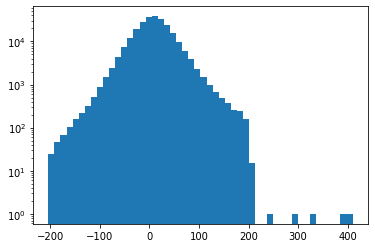

In [15]:
plt.hist(obs_merged_with_gaia.dr2_radial_velocity[where_good_gaia], bins=50, log=True);

#### comparision for Vrad_cnn and Gaia

6


6


6


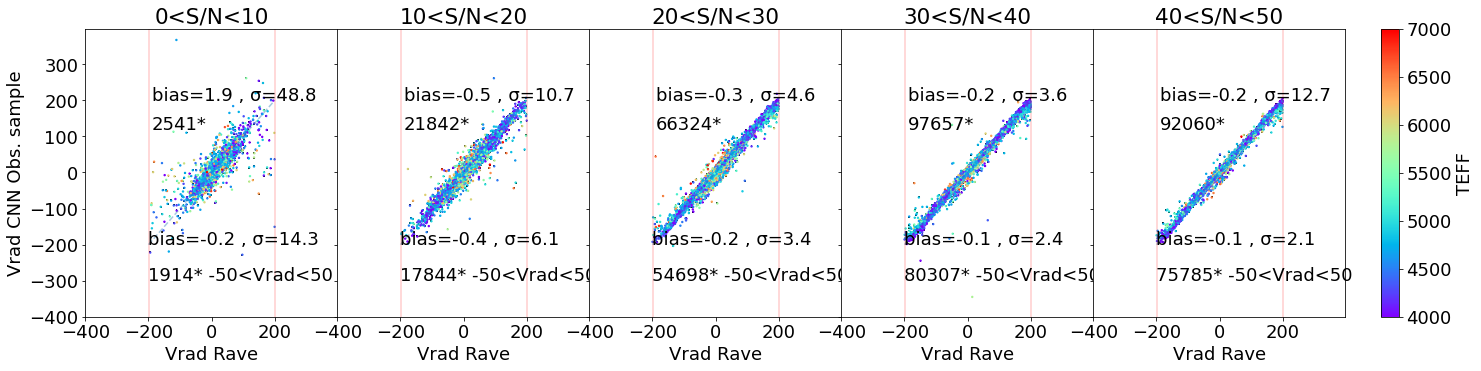

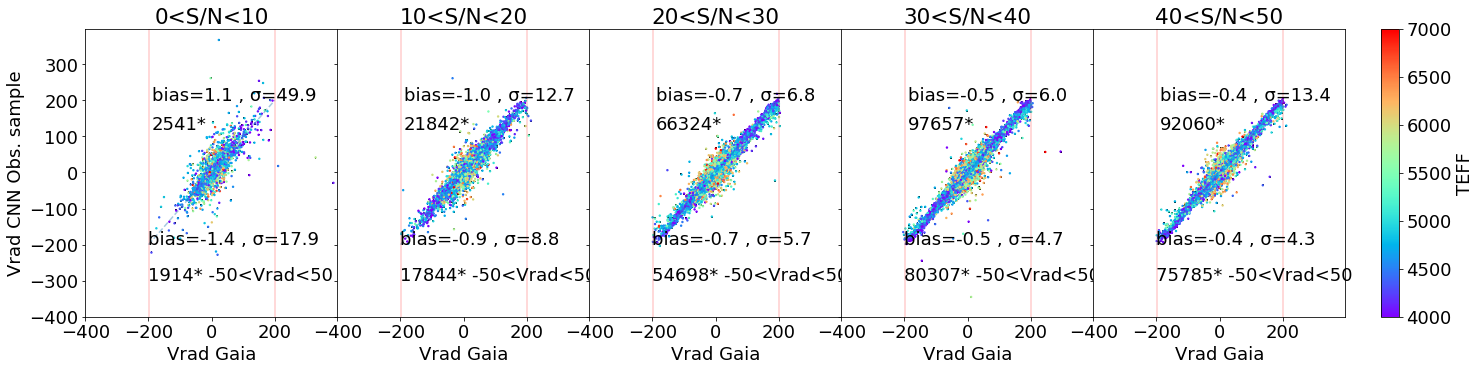

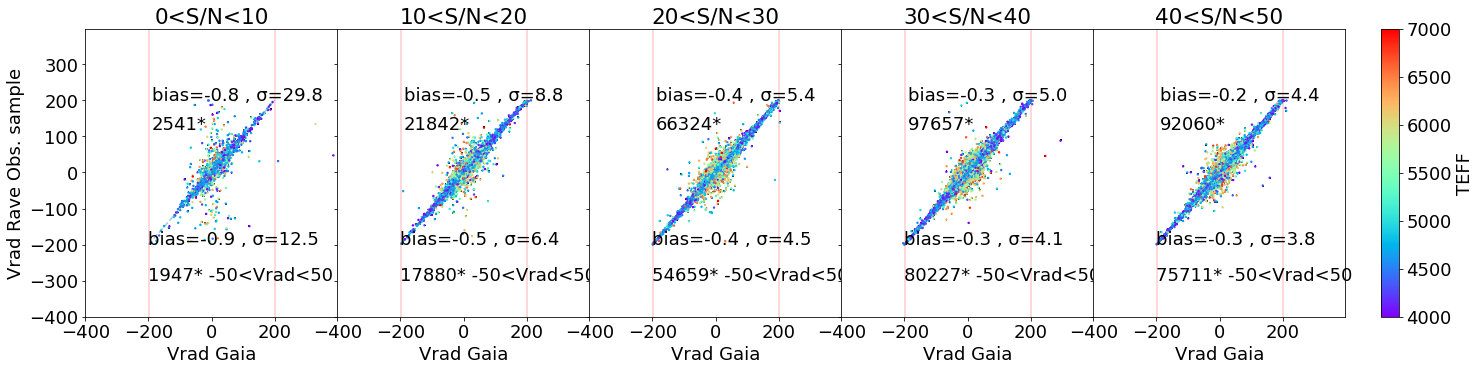

In [16]:
## plot for observed sample. i.e., comparision of HRV_SPARV with Vrad_cnn with atmospheric parameters

snr_range = np.arange(0,60,10)
print(len(snr_range))
ncols = len(snr_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (obs_merged_with_gaia.SNR_med_SPARV > snr_range[i]) & (obs_merged_with_gaia.SNR_med_SPARV < snr_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(obs_merged_with_gaia.HRV_SPARV[w], obs_merged_with_gaia.Vrad_cnn[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(obs_merged_with_gaia.HRV_SPARV[w], obs_merged_with_gaia.Vrad_cnn[w], c=obs_merged_with_gaia.Teff_BDASP[w],s=2.0,cmap='rainbow', vmin=4000,vmax=7000, rasterized=True)

    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad Rave")
    if i == 0 : ax[i].set_ylabel("Vrad CNN Obs. sample")
    ax[i].set_title(str(snr_range[i]) + "<S/N<" + str(snr_range[i+1]))
    #ax[i].set_xticks([-100,0,100])
    ax[i].text(-190,200,"bias="+str(round(np.mean(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.HRV_SPARV[w]),1))+" , \u03C3="+str(round(np.std(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.HRV_SPARV[w]),1)),color='black')  
    ax[i].text(-190,120,str(len(obs_merged_with_gaia.Vrad_cnn[w])) + '*',color='black')
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])- (obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])),1))+" , \u03C3="+str(round(np.std((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])-(obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])),1)),color='black')  
    ax[i].text(-200,-300,str(len(obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)

    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])
#cb_ax.plot(alle.HRV_SPARV[w],(alle.Vrad_cnn[w] - alle.HRV_SPARV[w]))
cbar = fig.colorbar(cs, cax=cb_ax,label='TEFF')
plt.savefig("plots/"+run+"/vrad_cnn_vs_rave_SNR.png", bbox_inches='tight')


## plot for observed sample. i.e., comparision of HRV_SPARV with Vrad_cnn with atmospheric parameters

snr_range = np.arange(0,60,10)
print(len(snr_range))
ncols = len(snr_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    #print(i)
    w = (obs_merged_with_gaia.SNR_med_SPARV > snr_range[i]) & (obs_merged_with_gaia.SNR_med_SPARV < snr_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.Vrad_cnn[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.Vrad_cnn[w], c=obs_merged_with_gaia.Teff_BDASP[w],s=2.0,cmap='rainbow', vmin=4000,vmax=7000, rasterized=True)

    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad Gaia")
    if i == 0 : ax[i].set_ylabel("Vrad CNN Obs. sample")
    ax[i].set_title(str(snr_range[i]) + "<S/N<" + str(snr_range[i+1]))
    #ax[i].set_xticks([-100,0,100])
    ax[i].text(-190,200,"bias="+str(round(np.mean(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1))+" , \u03C3="+str(round(np.std(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1)),color='black')  
    ax[i].text(-190,120,str(len(obs_merged_with_gaia.Vrad_cnn[w])) + '*',color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])- (obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1))+" , \u03C3="+str(round(np.std((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])-(obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1)),color='black')  
    ax[i].text(-200,-300,str(len(obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])

cbar = fig.colorbar(cs, cax=cb_ax,label='TEFF')
plt.savefig("plots/"+run+"/vrad_cnn_vs_gaia_SNR.png", bbox_inches='tight')


## plot for observed sample. i.e., comparision of HRV_SPARV with Vrad_cnn with atmospheric parameters

snr_range = np.arange(0,60,10)
print(len(snr_range))
ncols = len(snr_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (obs_merged_with_gaia.SNR_med_SPARV > snr_range[i]) & (obs_merged_with_gaia.SNR_med_SPARV < snr_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.HRV_SPARV[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs = ax[i].scatter(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.HRV_SPARV[w], c=obs_merged_with_gaia.Teff_BDASP[w],s=2.0,cmap='rainbow', vmin=4000,vmax=7000, rasterized=True)

    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad Gaia")
    if i == 0 : ax[i].set_ylabel("Vrad Rave Obs. sample")
    ax[i].set_title(str(snr_range[i]) + "<S/N<" + str(snr_range[i+1]))
    #ax[i].set_xticks([-100,0,100])
    ax[i].text(-190,200,"bias="+str(round(np.mean(obs_merged_with_gaia.HRV_SPARV[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1))+" , \u03C3="+str(round(np.std(obs_merged_with_gaia.HRV_SPARV[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1)),color='black')  
    ax[i].text(-190,120,str(len(obs_merged_with_gaia.HRV_SPARV[w])) + '*',color='black')

    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)

    ax[i].text(-200,-200,"bias="+str(round(np.mean((obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])- (obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1))+" , \u03C3="+str(round(np.std((obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])-(obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1)),color='black')  
    ax[i].text(-200,-300,str(len(obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])
cbar = fig.colorbar(cs, cax=cb_ax,label='TEFF')
plt.savefig("plots/"+run+"/vrad_rave_vs_gaia_SNR.png", bbox_inches='tight')



7


7


7


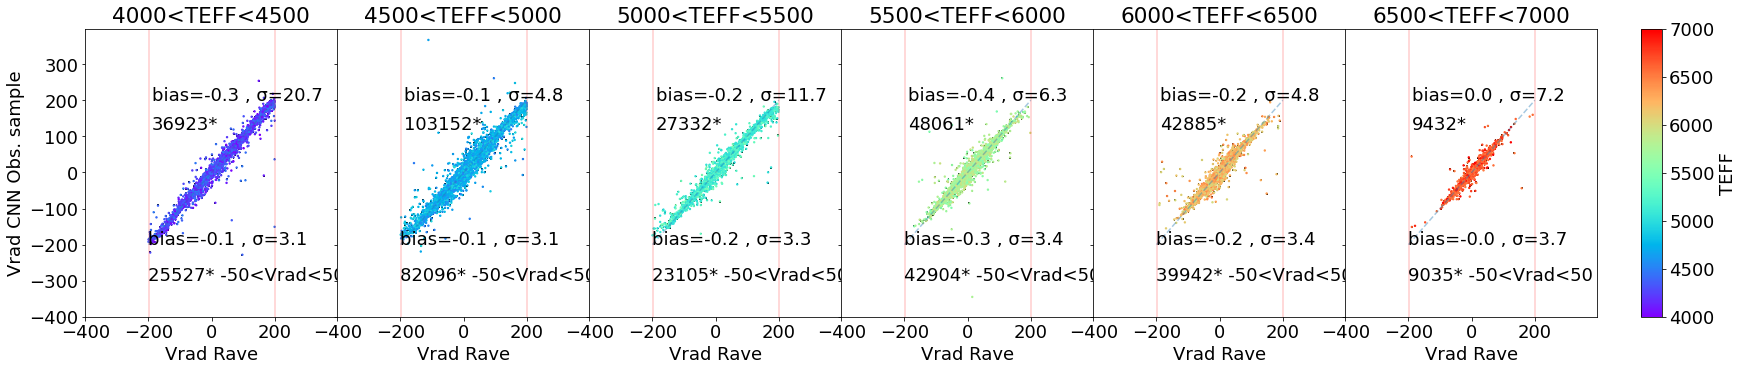

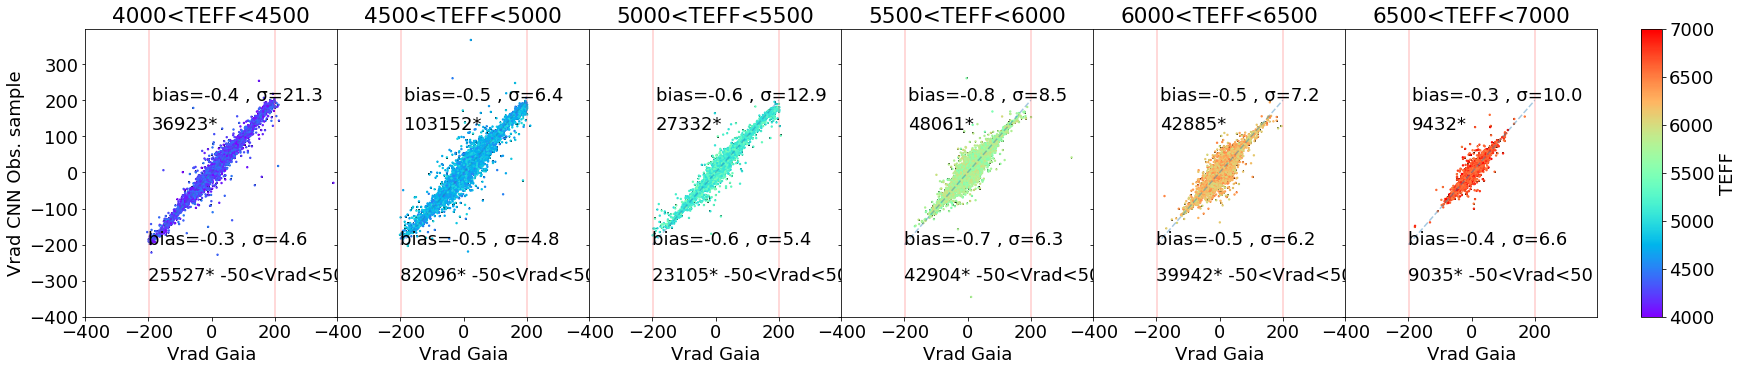

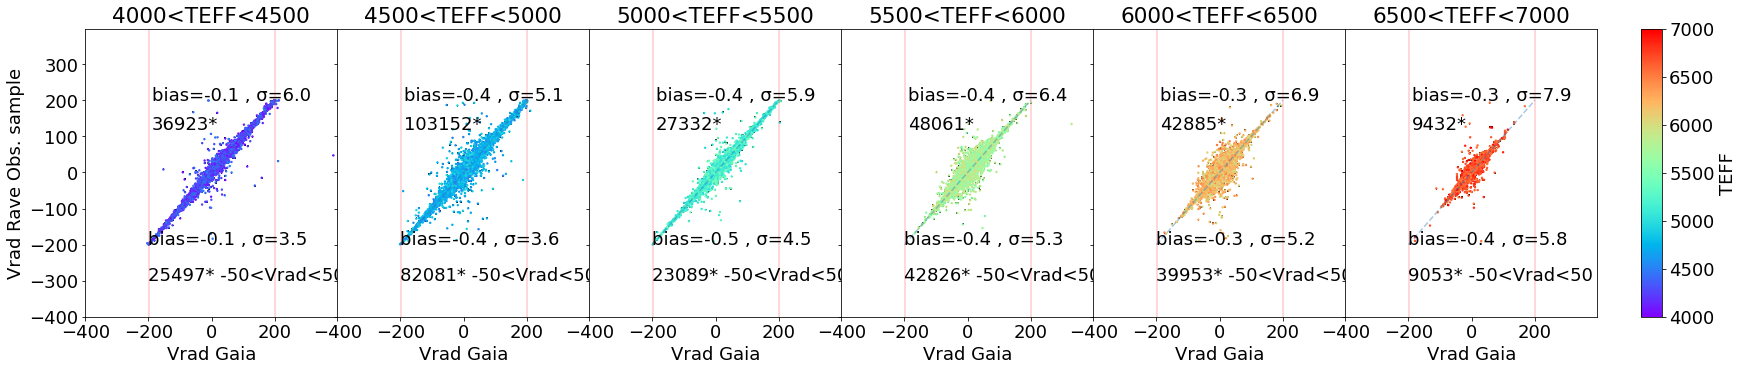

In [17]:
## plot for observed sample. i.e., comparision of HRV_SPARV with Vrad_cnn with Teff range

teff_range = np.arange(4000,7500,500)
print(len(teff_range))
ncols = len(teff_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (obs_merged_with_gaia.Teff_BDASP > teff_range[i]) & (obs_merged_with_gaia.Teff_BDASP < teff_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(obs_merged_with_gaia.HRV_SPARV[w], obs_merged_with_gaia.Vrad_cnn[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(obs_merged_with_gaia.HRV_SPARV[w], obs_merged_with_gaia.Vrad_cnn[w], c=obs_merged_with_gaia.Teff_BDASP[w],s=2.0,cmap='rainbow', vmin=4000,vmax=7000, rasterized=True)

    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad Rave")
    
    if i == 0 : ax[i].set_ylabel("Vrad CNN Obs. sample")
    ax[i].set_title(str(teff_range[i]) + "<TEFF<" + str(teff_range[i+1]))
    #ax[i].set_xticks([-100,0,100])
    
    ax[i].text(-190,200,"bias="+str(round(np.mean(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.HRV_SPARV[w]),1))+" , \u03C3="+str(round(np.std(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.HRV_SPARV[w]),1)),color='black')  
    ax[i].text(-190,120,str(len(obs_merged_with_gaia.Vrad_cnn[w])) + '*',color='black')
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])- (obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])),1))+" , \u03C3="+str(round(np.std((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])-(obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])),1)),color='black')  
    ax[i].text(-200,-300,str(len(obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)

    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])
#cb_ax.plot(alle.HRV_SPARV[w],(alle.Vrad_cnn[w] - alle.HRV_SPARV[w]))
cbar = fig.colorbar(cs, cax=cb_ax,label='TEFF')
plt.savefig("plots/"+run+"/vrad_cnn_vs_rave_TEFF.png", bbox_inches='tight')



teff_range = np.arange(4000,7500,500)
print(len(teff_range))
ncols = len(teff_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    #print(i)
    w = (obs_merged_with_gaia.Teff_BDASP > teff_range[i]) & (obs_merged_with_gaia.Teff_BDASP < teff_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.Vrad_cnn[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.Vrad_cnn[w], c=obs_merged_with_gaia.Teff_BDASP[w],s=2.0,cmap='rainbow', vmin=4000,vmax=7000, rasterized=True)

    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad Gaia")
    
    if i == 0 : ax[i].set_ylabel("Vrad CNN Obs. sample")
    ax[i].set_title(str(teff_range[i]) + "<TEFF<" + str(teff_range[i+1]))
    #ax[i].set_xticks([-100,0,100])
    
    ax[i].text(-190,200,"bias="+str(round(np.mean(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1))+" , \u03C3="+str(round(np.std(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1)),color='black')  
    ax[i].text(-190,120,str(len(obs_merged_with_gaia.Vrad_cnn[w])) + '*',color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])- (obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1))+" , \u03C3="+str(round(np.std((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])-(obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1)),color='black')  
    ax[i].text(-200,-300,str(len(obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])

cbar = fig.colorbar(cs, cax=cb_ax,label='TEFF')
plt.savefig("plots/"+run+"/vrad_cnn_vs_gaia_TEFF.png", bbox_inches='tight')



teff_range = np.arange(4000,7500,500)
print(len(teff_range))
ncols = len(teff_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (obs_merged_with_gaia.Teff_BDASP > teff_range[i]) & (obs_merged_with_gaia.Teff_BDASP < teff_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.HRV_SPARV[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.HRV_SPARV[w], c=obs_merged_with_gaia.Teff_BDASP[w],s=2.0,cmap='rainbow', vmin=4000,vmax=7000, rasterized=True)

    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    
    ax[i].set_xlabel("Vrad Gaia")
    if i == 0 : ax[i].set_ylabel("Vrad Rave Obs. sample")
    ax[i].set_title(str(teff_range[i]) + "<TEFF<" + str(teff_range[i+1]))
    #ax[i].set_xticks([-100,0,100])
    ax[i].text(-190,200,"bias="+str(round(np.mean(obs_merged_with_gaia.HRV_SPARV[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1))+" , \u03C3="+str(round(np.std(obs_merged_with_gaia.HRV_SPARV[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1)),color='black')  
    ax[i].text(-190,120,str(len(obs_merged_with_gaia.HRV_SPARV[w])) + '*',color='black')

    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)

    ax[i].text(-200,-200,"bias="+str(round(np.mean((obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])- (obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1))+" , \u03C3="+str(round(np.std((obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])-(obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1)),color='black')  
    ax[i].text(-200,-300,str(len(obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])
cbar = fig.colorbar(cs, cax=cb_ax,label='TEFF')
plt.savefig("plots/"+run+"/vrad_rave_vs_gaia_TEFF.png", bbox_inches='tight')

7


7


7


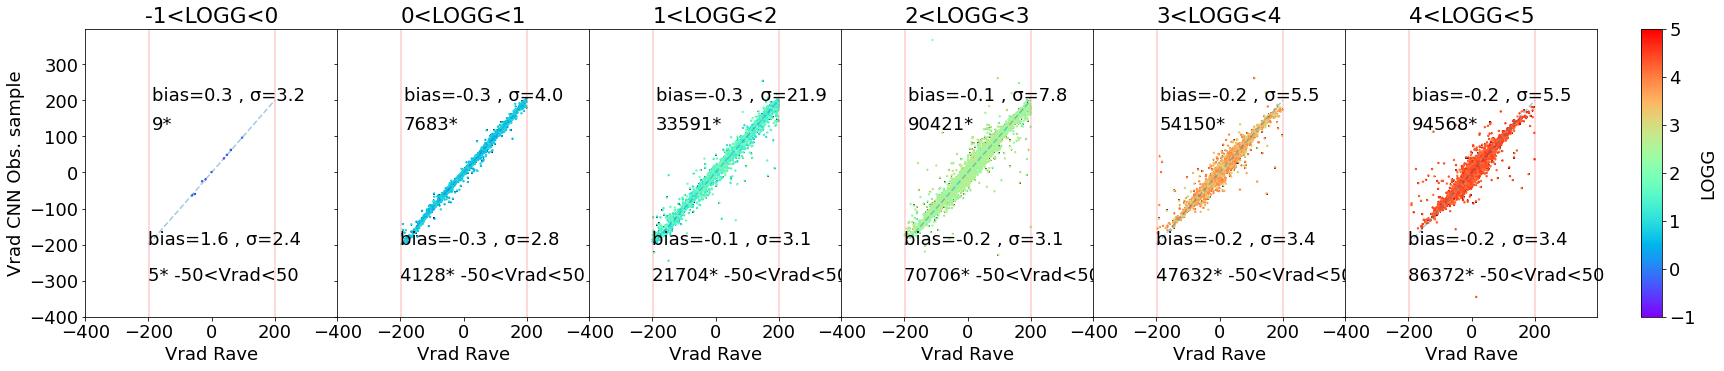

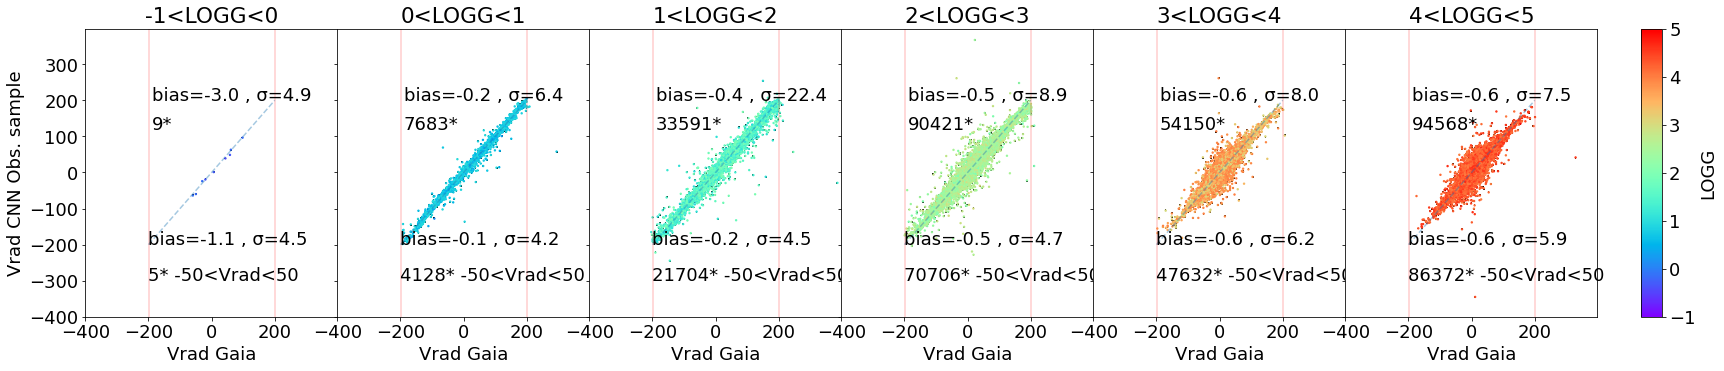

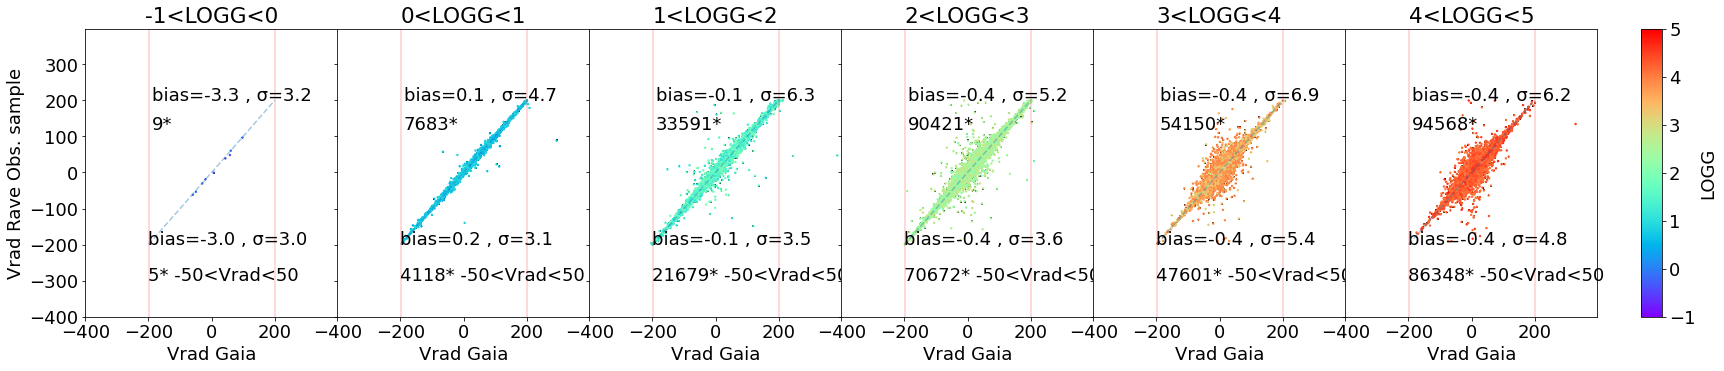

In [18]:
## plot for observed sample. i.e., comparision of HRV_SPARV with Vrad_cnn with LOGG range

logg_range = np.arange(-1,6,1)
print(len(logg_range))
ncols = len(logg_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    #print(i)
    w = (obs_merged_with_gaia.logg_BDASP > logg_range[i]) & (obs_merged_with_gaia.logg_BDASP < logg_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(obs_merged_with_gaia.HRV_SPARV[w], obs_merged_with_gaia.Vrad_cnn[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(obs_merged_with_gaia.HRV_SPARV[w], obs_merged_with_gaia.Vrad_cnn[w], c=obs_merged_with_gaia.logg_BDASP[w],s=2.0,cmap='rainbow', vmin=-1,vmax=5, rasterized=True)

    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    
    ax[i].set_xlabel("Vrad Rave")
    if i == 0 : ax[i].set_ylabel("Vrad CNN Obs. sample")
    ax[i].set_title(str(logg_range[i]) + "<LOGG<" + str(logg_range[i+1]))
    #ax[i].set_xticks([-100,0,100])
    
    ax[i].text(-190,200,"bias="+str(round(np.mean(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.HRV_SPARV[w]),1))+" , \u03C3="+str(round(np.std(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.HRV_SPARV[w]),1)),color='black')  
    ax[i].text(-190,120,str(len(obs_merged_with_gaia.Vrad_cnn[w])) + '*',color='black')
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])- (obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])),1))+" , \u03C3="+str(round(np.std((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])-(obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])),1)),color='black')  
    ax[i].text(-200,-300,str(len(obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)

    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])
#cb_ax.plot(alle.HRV_SPARV[w],(alle.Vrad_cnn[w] - alle.HRV_SPARV[w]))
cbar = fig.colorbar(cs, cax=cb_ax,label='LOGG')
plt.savefig("plots/"+run+"/vrad_cnn_vs_rave_LOGG.png", bbox_inches='tight')



logg_range = np.arange(-1,6,1)
print(len(logg_range))
ncols = len(logg_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (obs_merged_with_gaia.logg_BDASP > logg_range[i]) & (obs_merged_with_gaia.logg_BDASP < logg_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.Vrad_cnn[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.Vrad_cnn[w], c=obs_merged_with_gaia.logg_BDASP[w],s=2.0,cmap='rainbow', vmin=-1,vmax=5, rasterized=True)
    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    
    ax[i].set_xlabel("Vrad Gaia")
    if i == 0 : ax[i].set_ylabel("Vrad CNN Obs. sample")
    ax[i].set_title(str(logg_range[i]) + "<LOGG<" + str(logg_range[i+1]))
    #ax[i].set_xticks([-100,0,100])
    
    ax[i].text(-190,200,"bias="+str(round(np.mean(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1))+" , \u03C3="+str(round(np.std(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1)),color='black')  
    ax[i].text(-190,120,str(len(obs_merged_with_gaia.Vrad_cnn[w])) + '*',color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])- (obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1))+" , \u03C3="+str(round(np.std((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])-(obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1)),color='black')  
    ax[i].text(-200,-300,str(len(obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])

cbar = fig.colorbar(cs, cax=cb_ax,label='LOGG')
plt.savefig("plots/"+run+"/vrad_cnn_vs_gaia_LOGG.png", bbox_inches='tight')



logg_range = np.arange(-1,6,1)
print(len(logg_range))
ncols = len(logg_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (obs_merged_with_gaia.logg_BDASP > logg_range[i]) & (obs_merged_with_gaia.logg_BDASP < logg_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.HRV_SPARV[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.HRV_SPARV[w], c=obs_merged_with_gaia.logg_BDASP[w],s=2.0,cmap='rainbow', vmin=-1,vmax=5, rasterized=True)
    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    
    ax[i].set_xlabel("Vrad Gaia")
    if i == 0 : ax[i].set_ylabel("Vrad Rave Obs. sample")
    ax[i].set_title(str(logg_range[i]) + "<LOGG<" + str(logg_range[i+1]))
    #ax[i].set_xticks([-100,0,100])
    
    ax[i].text(-190,200,"bias="+str(round(np.mean(obs_merged_with_gaia.HRV_SPARV[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1))+" , \u03C3="+str(round(np.std(obs_merged_with_gaia.HRV_SPARV[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1)),color='black')  
    ax[i].text(-190,120,str(len(obs_merged_with_gaia.HRV_SPARV[w])) + '*',color='black')

    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)

    ax[i].text(-200,-200,"bias="+str(round(np.mean((obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])- (obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1))+" , \u03C3="+str(round(np.std((obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])-(obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1)),color='black')  
    ax[i].text(-200,-300,str(len(obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])
cbar = fig.colorbar(cs, cax=cb_ax,label='LOGG')
plt.savefig("plots/"+run+"/vrad_rave_vs_gaia_LOGG.png", bbox_inches='tight')

In [19]:
max(obs_merged_with_gaia.M_H_BDASP)

0.6801699999999999

8


8


8


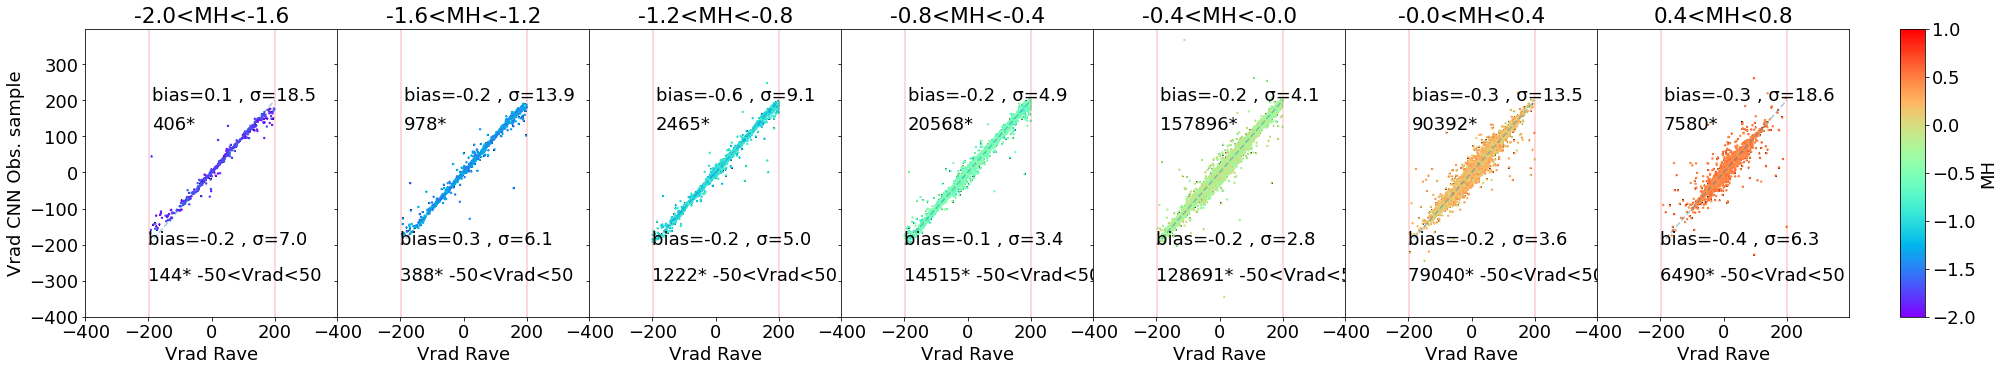

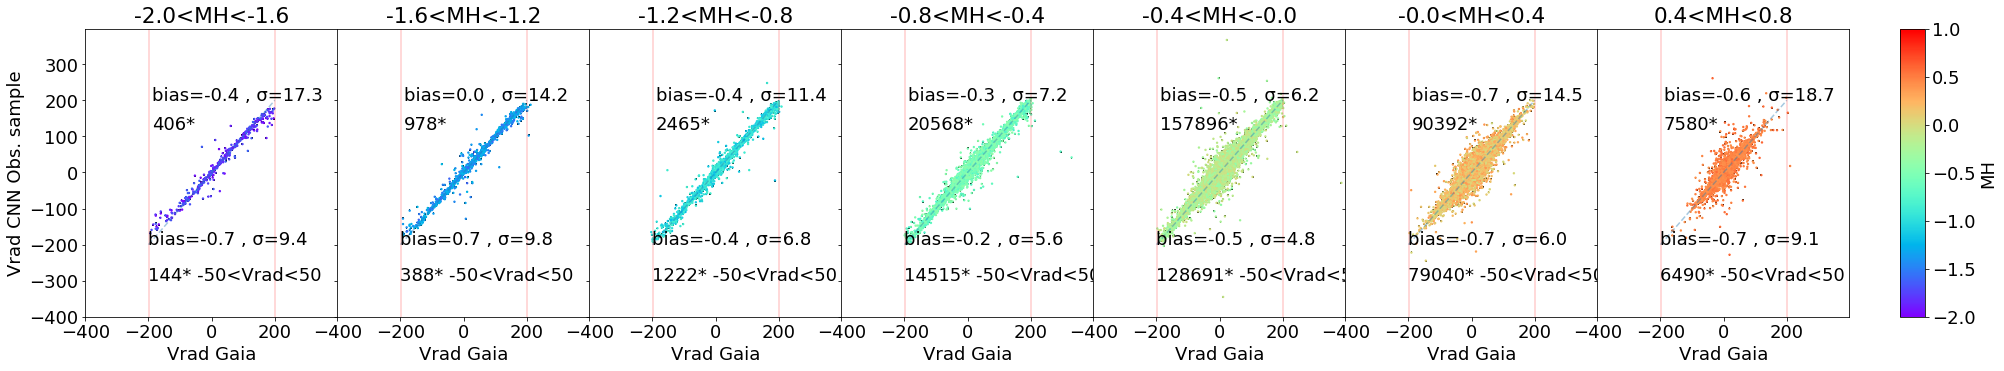

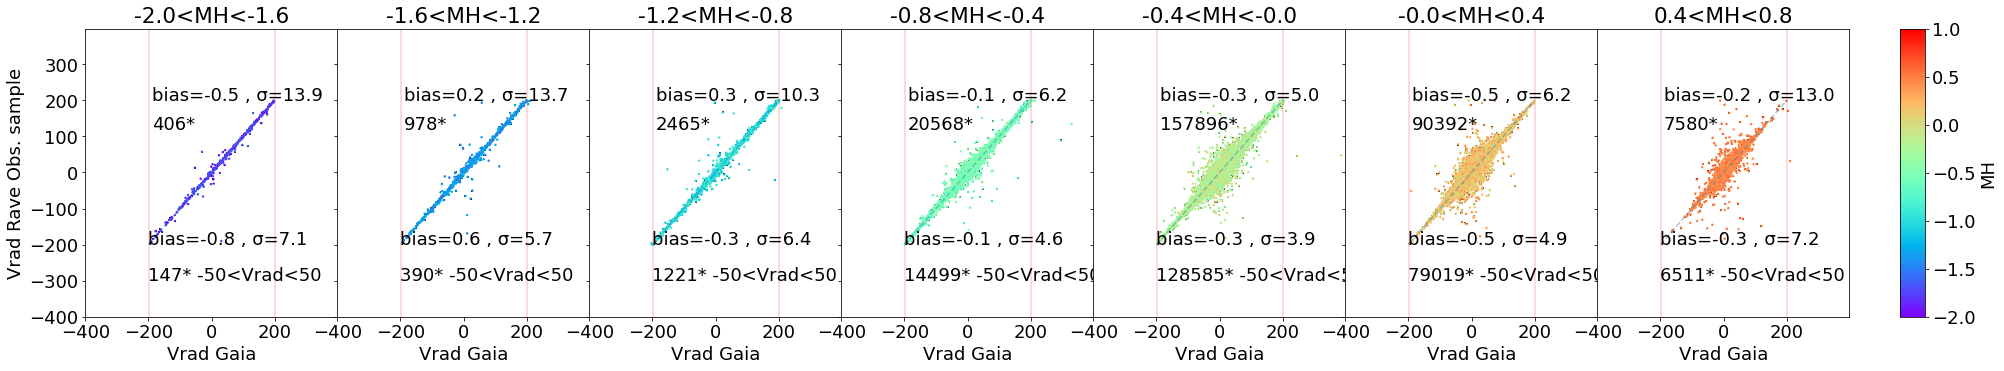

In [20]:
## plot for observed sample. i.e., comparision of HRV_SPARV with Vrad_cnn with LOGG range

MH_range = np.arange(-2,1,0.4)
print(len(MH_range))
ncols = len(MH_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (obs_merged_with_gaia.M_H_BDASP > MH_range[i]) & (obs_merged_with_gaia.M_H_BDASP < MH_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(obs_merged_with_gaia.HRV_SPARV[w], obs_merged_with_gaia.Vrad_cnn[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(obs_merged_with_gaia.HRV_SPARV[w], obs_merged_with_gaia.Vrad_cnn[w], c=obs_merged_with_gaia.M_H_BDASP[w],s=2.0,cmap='rainbow', vmin=-2,vmax=1, rasterized=True)

    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    
    ax[i].set_xlabel("Vrad Rave")
    if i == 0 : ax[i].set_ylabel("Vrad CNN Obs. sample")
    ax[i].set_title(str(round(MH_range[i],1)) + "<MH<" + str(round(MH_range[i+1],1)))
    #ax[i].set_xticks([-100,0,100])
    
    ax[i].text(-190,200,"bias="+str(round(np.mean(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.HRV_SPARV[w]),1))+" , \u03C3="+str(round(np.std(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.HRV_SPARV[w]),1)),color='black')  
    ax[i].text(-190,120,str(len(obs_merged_with_gaia.Vrad_cnn[w])) + '*',color='black')
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])- (obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])),1))+" , \u03C3="+str(round(np.std((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])-(obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])),1)),color='black')  
    ax[i].text(-200,-300,str(len(obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)

    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])
#cb_ax.plot(alle.HRV_SPARV[w],(alle.Vrad_cnn[w] - alle.HRV_SPARV[w]))
cbar = fig.colorbar(cs, cax=cb_ax,label='MH')
plt.savefig("plots/"+run+"/vrad_cnn_vs_rave_MH.png", bbox_inches='tight')


MH_range = np.arange(-2,1,0.4)
print(len(MH_range))
ncols = len(MH_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (obs_merged_with_gaia.M_H_BDASP > MH_range[i]) & (obs_merged_with_gaia.M_H_BDASP < MH_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.Vrad_cnn[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.Vrad_cnn[w], c=obs_merged_with_gaia.M_H_BDASP[w],s=2.0,cmap='rainbow', vmin=-2,vmax=1, rasterized=True)
    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    
    ax[i].set_xlabel("Vrad Gaia")
    if i == 0 : ax[i].set_ylabel("Vrad CNN Obs. sample")
    ax[i].set_title(str(round(MH_range[i],1)) + "<MH<" + str(round(MH_range[i+1],1)))
    #ax[i].set_xticks([-100,0,100])
    
    ax[i].text(-190,200,"bias="+str(round(np.mean(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1))+" , \u03C3="+str(round(np.std(obs_merged_with_gaia.Vrad_cnn[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1)),color='black')  
    ax[i].text(-190,120,str(len(obs_merged_with_gaia.Vrad_cnn[w])) + '*',color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])- (obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1))+" , \u03C3="+str(round(np.std((obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])-(obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1)),color='black')  
    ax[i].text(-200,-300,str(len(obs_merged_with_gaia.Vrad_cnn[((obs_merged_with_gaia.Vrad_cnn < 50) & (obs_merged_with_gaia.Vrad_cnn > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])

cbar = fig.colorbar(cs, cax=cb_ax,label='MH')
plt.savefig("plots/"+run+"/vrad_cnn_vs_gaia_MH.png", bbox_inches='tight')


MH_range = np.arange(-2,1,0.4)
print(len(MH_range))
ncols = len(MH_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (obs_merged_with_gaia.M_H_BDASP > MH_range[i]) & (obs_merged_with_gaia.M_H_BDASP < MH_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.HRV_SPARV[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(obs_merged_with_gaia.dr2_radial_velocity[w], obs_merged_with_gaia.HRV_SPARV[w], c=obs_merged_with_gaia.M_H_BDASP[w],s=2.0,cmap='rainbow', vmin=-2,vmax=1, rasterized=True)

    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    
    ax[i].set_xlabel("Vrad Gaia")
    if i == 0 : ax[i].set_ylabel("Vrad Rave Obs. sample")
    ax[i].set_title(str(round(MH_range[i],1)) + "<MH<" + str(round(MH_range[i+1],1)))
    #ax[i].set_xticks([-100,0,100])
    
    ax[i].text(-190,200,"bias="+str(round(np.mean(obs_merged_with_gaia.HRV_SPARV[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1))+" , \u03C3="+str(round(np.std(obs_merged_with_gaia.HRV_SPARV[w]-obs_merged_with_gaia.dr2_radial_velocity[w]),1)),color='black')  
    ax[i].text(-190,120,str(len(obs_merged_with_gaia.HRV_SPARV[w])) + '*',color='black')

    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)

    ax[i].text(-200,-200,"bias="+str(round(np.mean((obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])- (obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1))+" , \u03C3="+str(round(np.std((obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])-(obs_merged_with_gaia.dr2_radial_velocity[((obs_merged_with_gaia.dr2_radial_velocity < 50) & (obs_merged_with_gaia.dr2_radial_velocity > -50))][w])),1)),color='black')  
    ax[i].text(-200,-300,str(len(obs_merged_with_gaia.HRV_SPARV[((obs_merged_with_gaia.HRV_SPARV < 50) & (obs_merged_with_gaia.HRV_SPARV > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])
cbar = fig.colorbar(cs, cax=cb_ax,label='MH')
plt.savefig("plots/"+run+"/vrad_rave_vs_gaia_MH.png", bbox_inches='tight')



#### comparision for Apogee, Gaia and Rave

In [21]:
apogee = pd.read_csv('Data/allStar-dr17-synspec_rev1.csv')

In [22]:
merge_rave_gaia_apogee = pd.merge(obs_merged_with_gaia, apogee, on='GAIAEDR3_SOURCE_ID')

6


6


6


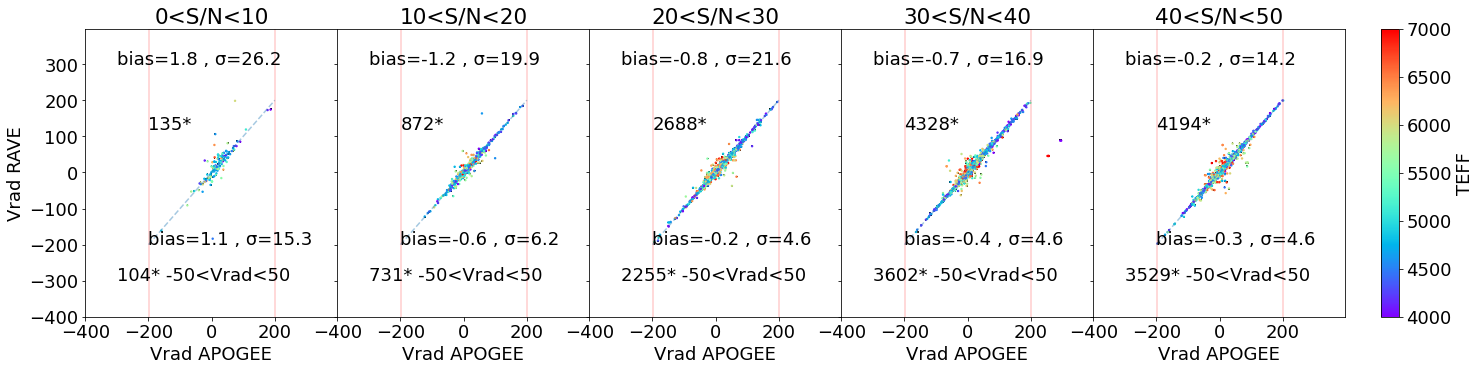

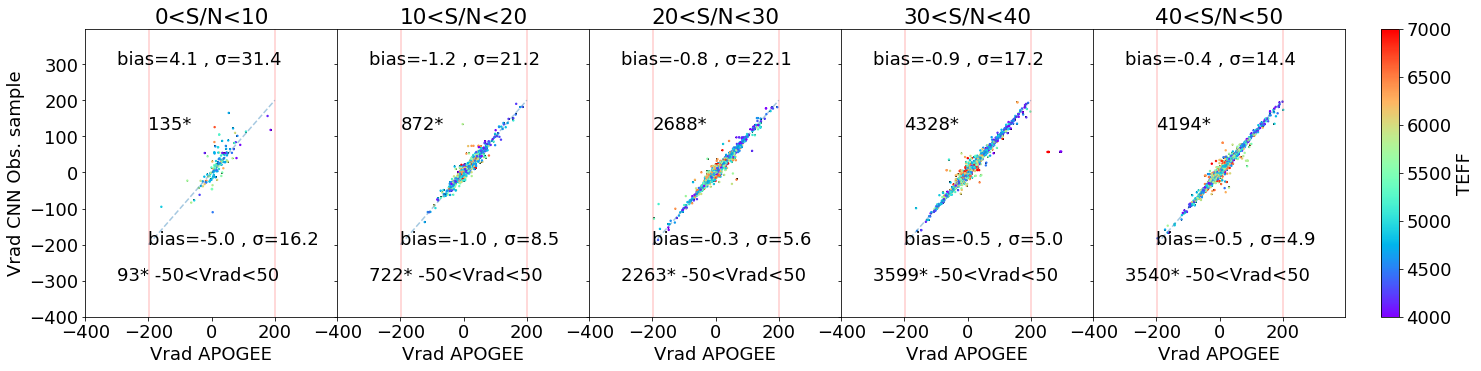

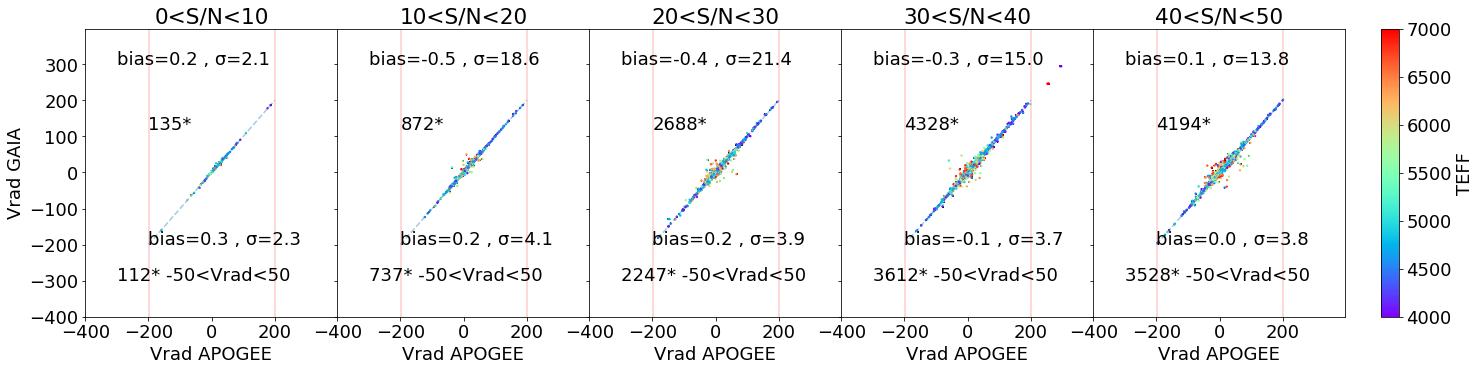

In [23]:
## plot for observed sample. i.e., comparision of Rave with APOGEE Vrad with atmospheric parameters

snr_range = np.arange(0,60,10)
print(len(snr_range))
ncols = len(snr_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (merge_rave_gaia_apogee.SNR_med_SPARV > snr_range[i]) & (merge_rave_gaia_apogee.SNR_med_SPARV < snr_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.HRV_SPARV[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.HRV_SPARV[w], c=merge_rave_gaia_apogee.Teff_BDASP[w],s=2.0,cmap='rainbow', vmin=4000,vmax=7000, rasterized=True)
    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    
    ax[i].set_xlabel("Vrad APOGEE")
    if i == 0 : ax[i].set_ylabel("Vrad RAVE")
    ax[i].set_title(str(snr_range[i]) + "<S/N<" + str(snr_range[i+1]))
    
    #ax[i].set_xticks([-200,-100,0,100,200])
    ax[i].text(-300,300,"bias="+str(round(np.mean(merge_rave_gaia_apogee.HRV_SPARV[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1))+" , \u03C3="+str(round(np.std(merge_rave_gaia_apogee.HRV_SPARV[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1)),color='black')  
    ax[i].text(-200,120,str(len(merge_rave_gaia_apogee.HRV_SPARV[w])) + '*',color='black')
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((merge_rave_gaia_apogee.HRV_SPARV[((merge_rave_gaia_apogee.HRV_SPARV < 50) & (merge_rave_gaia_apogee.HRV_SPARV > -50))][w])- (merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1))+" , \u03C3="+str(round(np.std((merge_rave_gaia_apogee.HRV_SPARV[((merge_rave_gaia_apogee.HRV_SPARV < 50) & (merge_rave_gaia_apogee.HRV_SPARV > -50))][w])-(merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1)),color='black')  
    ax[i].text(-300,-300,str(len(merge_rave_gaia_apogee.HRV_SPARV[((merge_rave_gaia_apogee.HRV_SPARV < 50) & (merge_rave_gaia_apogee.HRV_SPARV > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)

    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])
#cb_ax.plot(merge_rave_gaia_apogee.VHELIO_AVG[w],(merge_rave_gaia_apogee.Vrad_cnn[w] - merge_rave_gaia_apogee.VHELIO_AVG[w]))
cbar = fig.colorbar(cs, cax=cb_ax,label='TEFF')
plt.savefig("plots/"+run+"/vrad_rave_vs_apogee_SN.png", bbox_inches='tight')


## plot for observed sample. i.e., comparision of APOGEE_Vrad with Vrad_cnn with atmospheric parameters

snr_range = np.arange(0,60,10)
print(len(snr_range))
ncols = len(snr_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (merge_rave_gaia_apogee.SNR_med_SPARV > snr_range[i]) & (merge_rave_gaia_apogee.SNR_med_SPARV < snr_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.Vrad_cnn[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.Vrad_cnn[w], c=merge_rave_gaia_apogee.Teff_BDASP[w],s=2.0,cmap='rainbow', vmin=4000,vmax=7000, rasterized=True)
    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad APOGEE")
    
    if i == 0 : ax[i].set_ylabel("Vrad CNN Obs. sample")
    ax[i].set_title(str(snr_range[i]) + "<S/N<" + str(snr_range[i+1]))
    #ax[i].set_xticks([-200,-100,0,100,200])
    
    ax[i].text(-300,300,"bias="+str(round(np.mean(merge_rave_gaia_apogee.Vrad_cnn[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1))+" , \u03C3="+str(round(np.std(merge_rave_gaia_apogee.Vrad_cnn[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1)),color='black')  
    ax[i].text(-200,120,str(len(merge_rave_gaia_apogee.Vrad_cnn[w])) + '*',color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((merge_rave_gaia_apogee.Vrad_cnn[((merge_rave_gaia_apogee.Vrad_cnn < 50) & (merge_rave_gaia_apogee.Vrad_cnn > -50))][w])- (merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1))+" , \u03C3="+str(round(np.std((merge_rave_gaia_apogee.Vrad_cnn[((merge_rave_gaia_apogee.Vrad_cnn < 50) & (merge_rave_gaia_apogee.Vrad_cnn > -50))][w])-(merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1)),color='black')  
    ax[i].text(-300,-300,str(len(merge_rave_gaia_apogee.Vrad_cnn[((merge_rave_gaia_apogee.Vrad_cnn < 50) & (merge_rave_gaia_apogee.Vrad_cnn > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])

cbar = fig.colorbar(cs, cax=cb_ax,label='TEFF')
plt.savefig("plots/"+run+"/vrad_cnn_vs_apogee_SN.png", bbox_inches='tight')


## plot for observed sample. i.e., comparision of APOGEE_Vrad with Gaia_vrad with atmospheric parameters

snr_range = np.arange(0,60,10)
print(len(snr_range))
ncols = len(snr_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (merge_rave_gaia_apogee.SNR_med_SPARV > snr_range[i]) & (merge_rave_gaia_apogee.SNR_med_SPARV < snr_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.dr2_radial_velocity[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.dr2_radial_velocity[w], c=merge_rave_gaia_apogee.Teff_BDASP[w],s=2.0,cmap='rainbow', vmin=4000,vmax=7000, rasterized=True)
    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad APOGEE")
    
    if i == 0 : ax[i].set_ylabel("Vrad GAIA")
    ax[i].set_title(str(snr_range[i]) + "<S/N<" + str(snr_range[i+1]))
    #ax[i].set_xticks([-200,-100,0,100,200])
    
    ax[i].text(-300,300,"bias="+str(round(np.mean(merge_rave_gaia_apogee.dr2_radial_velocity[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1))+" , \u03C3="+str(round(np.std(merge_rave_gaia_apogee.dr2_radial_velocity[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1)),color='black')  
    ax[i].text(-200,120,str(len(merge_rave_gaia_apogee.dr2_radial_velocity[w])) + '*',color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((merge_rave_gaia_apogee.dr2_radial_velocity[((merge_rave_gaia_apogee.dr2_radial_velocity < 50) & (merge_rave_gaia_apogee.dr2_radial_velocity > -50))][w])- (merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1))+" , \u03C3="+str(round(np.std((merge_rave_gaia_apogee.dr2_radial_velocity[((merge_rave_gaia_apogee.dr2_radial_velocity < 50) & (merge_rave_gaia_apogee.dr2_radial_velocity > -50))][w])-(merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1)),color='black')  
    ax[i].text(-300,-300,str(len(merge_rave_gaia_apogee.dr2_radial_velocity[((merge_rave_gaia_apogee.dr2_radial_velocity < 50) & (merge_rave_gaia_apogee.dr2_radial_velocity > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])

cbar = fig.colorbar(cs, cax=cb_ax,label='TEFF')
plt.savefig("plots/"+run+"/gaia_vs_apogee_SN.png", bbox_inches='tight')

7


7


7


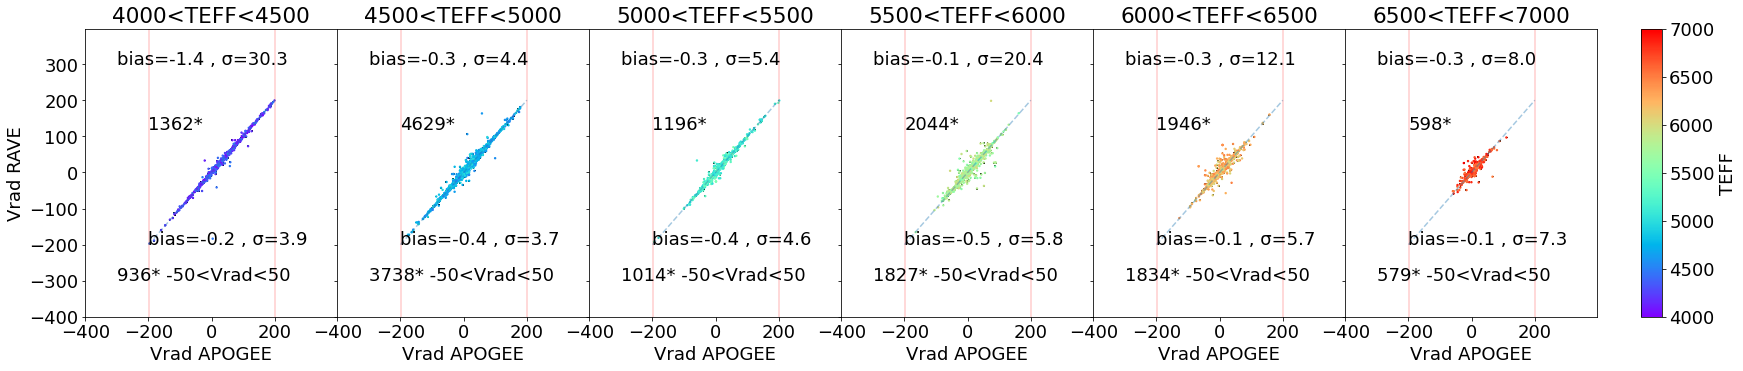

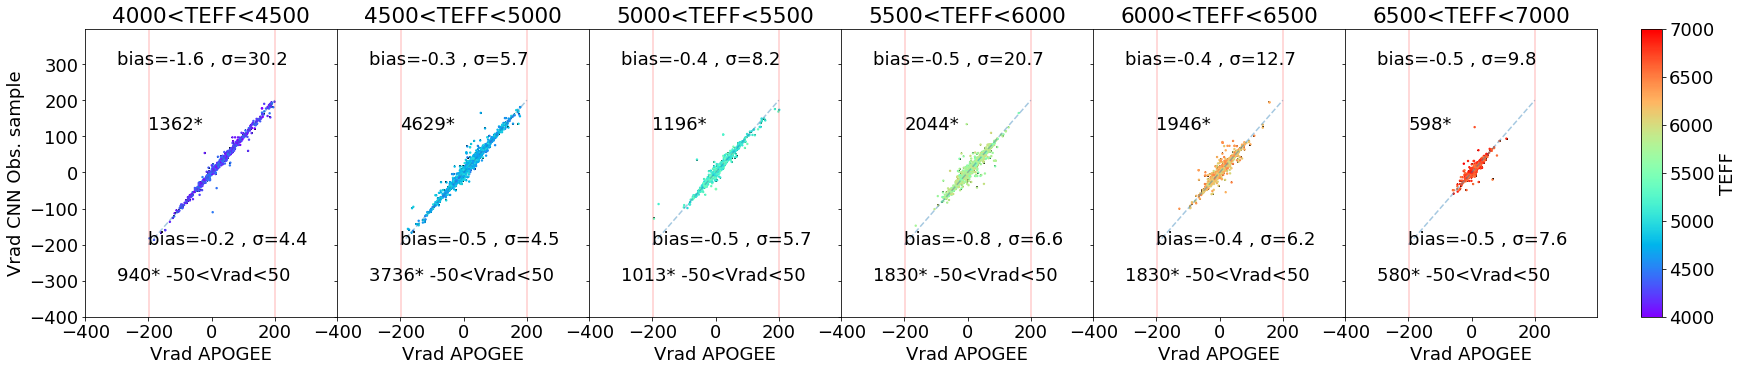

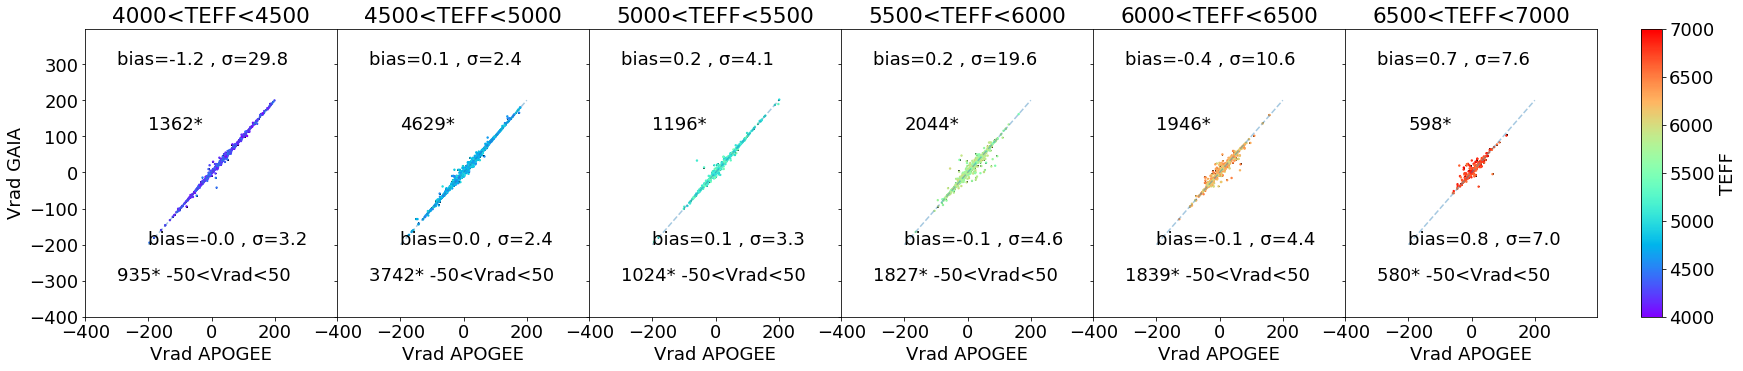

In [24]:
## plot for observed sample. i.e., comparision of Rave with APOGEE Vrad with Teff

teff_range = np.arange(4000,7500,500)
print(len(teff_range))
ncols = len(teff_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (merge_rave_gaia_apogee.Teff_BDASP > teff_range[i]) & (merge_rave_gaia_apogee.Teff_BDASP < teff_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.HRV_SPARV[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.HRV_SPARV[w], c=merge_rave_gaia_apogee.Teff_BDASP[w],s=2.0,cmap='rainbow', vmin=4000,vmax=7000, rasterized=True)
    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    
    ax[i].set_xlabel("Vrad APOGEE")
    if i == 0 : ax[i].set_ylabel("Vrad RAVE")
    ax[i].set_title(str(teff_range[i]) + "<TEFF<" + str(teff_range[i+1]))
    #ax[i].set_xticks([-200,-100,0,100,200])
    
    ax[i].text(-300,300,"bias="+str(round(np.mean(merge_rave_gaia_apogee.HRV_SPARV[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1))+" , \u03C3="+str(round(np.std(merge_rave_gaia_apogee.HRV_SPARV[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1)),color='black')  
    ax[i].text(-200,120,str(len(merge_rave_gaia_apogee.HRV_SPARV[w])) + '*',color='black')
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((merge_rave_gaia_apogee.HRV_SPARV[((merge_rave_gaia_apogee.HRV_SPARV < 50) & (merge_rave_gaia_apogee.HRV_SPARV > -50))][w])- (merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1))+" , \u03C3="+str(round(np.std((merge_rave_gaia_apogee.HRV_SPARV[((merge_rave_gaia_apogee.HRV_SPARV < 50) & (merge_rave_gaia_apogee.HRV_SPARV > -50))][w])-(merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1)),color='black')  
    ax[i].text(-300,-300,str(len(merge_rave_gaia_apogee.HRV_SPARV[((merge_rave_gaia_apogee.HRV_SPARV < 50) & (merge_rave_gaia_apogee.HRV_SPARV > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)

    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])
#cb_ax.plot(merge_rave_gaia_apogee.VHELIO_AVG[w],(merge_rave_gaia_apogee.Vrad_cnn[w] - merge_rave_gaia_apogee.VHELIO_AVG[w]))
cbar = fig.colorbar(cs, cax=cb_ax,label='TEFF')
plt.savefig("plots/"+run+"/vrad_rave_vs_apogee_TEFF.png", bbox_inches='tight')


## plot for observed sample. i.e., comparision of APOGEE_Vrad with Vrad_cnn with atmospheric parameters

teff_range = np.arange(4000,7500,500)
print(len(teff_range))
ncols = len(teff_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (merge_rave_gaia_apogee.Teff_BDASP > teff_range[i]) & (merge_rave_gaia_apogee.Teff_BDASP < teff_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.Vrad_cnn[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.Vrad_cnn[w], c=merge_rave_gaia_apogee.Teff_BDASP[w],s=2.0,cmap='rainbow', vmin=4000,vmax=7000, rasterized=True)
    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad APOGEE")
    
    if i == 0 : ax[i].set_ylabel("Vrad CNN Obs. sample")
    ax[i].set_title(str(teff_range[i]) + "<TEFF<" + str(teff_range[i+1]))
    #ax[i].set_xticks([-200,-100,0,100,200])
    
    ax[i].text(-300,300,"bias="+str(round(np.mean(merge_rave_gaia_apogee.Vrad_cnn[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1))+" , \u03C3="+str(round(np.std(merge_rave_gaia_apogee.Vrad_cnn[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1)),color='black')  
    ax[i].text(-200,120,str(len(merge_rave_gaia_apogee.Vrad_cnn[w])) + '*',color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((merge_rave_gaia_apogee.Vrad_cnn[((merge_rave_gaia_apogee.Vrad_cnn < 50) & (merge_rave_gaia_apogee.Vrad_cnn > -50))][w])- (merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1))+" , \u03C3="+str(round(np.std((merge_rave_gaia_apogee.Vrad_cnn[((merge_rave_gaia_apogee.Vrad_cnn < 50) & (merge_rave_gaia_apogee.Vrad_cnn > -50))][w])-(merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1)),color='black')  
    ax[i].text(-300,-300,str(len(merge_rave_gaia_apogee.Vrad_cnn[((merge_rave_gaia_apogee.Vrad_cnn < 50) & (merge_rave_gaia_apogee.Vrad_cnn > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])

cbar = fig.colorbar(cs, cax=cb_ax,label='TEFF')
plt.savefig("plots/"+run+"/vrad_cnn_vs_apogee_TEFF.png", bbox_inches='tight')


## plot for observed sample. i.e., comparision of APOGEE_Vrad with Gaia_vrad with atmospheric parameters

teff_range = np.arange(4000,7500,500)
print(len(teff_range))
ncols = len(teff_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (merge_rave_gaia_apogee.Teff_BDASP > teff_range[i]) & (merge_rave_gaia_apogee.Teff_BDASP < teff_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.dr2_radial_velocity[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.dr2_radial_velocity[w], c=merge_rave_gaia_apogee.Teff_BDASP[w],s=2.0,cmap='rainbow', vmin=4000,vmax=7000, rasterized=True)
    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad APOGEE")
    
    if i == 0 : ax[i].set_ylabel("Vrad GAIA")
    ax[i].set_title(str(teff_range[i]) + "<TEFF<" + str(teff_range[i+1]))
    #ax[i].set_xticks([-200,-100,0,100,200])
    
    ax[i].text(-300,300,"bias="+str(round(np.mean(merge_rave_gaia_apogee.dr2_radial_velocity[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1))+" , \u03C3="+str(round(np.std(merge_rave_gaia_apogee.dr2_radial_velocity[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1)),color='black')  
    ax[i].text(-200,120,str(len(merge_rave_gaia_apogee.dr2_radial_velocity[w])) + '*',color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    #ax[i].axhline(Vrad_min_train, color="red", alpha=0.2)
    #ax[i].axhline(Vrad_max_train, color="red", alpha=0.2)
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((merge_rave_gaia_apogee.dr2_radial_velocity[((merge_rave_gaia_apogee.dr2_radial_velocity < 50) & (merge_rave_gaia_apogee.dr2_radial_velocity > -50))][w])- (merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1))+" , \u03C3="+str(round(np.std((merge_rave_gaia_apogee.dr2_radial_velocity[((merge_rave_gaia_apogee.dr2_radial_velocity < 50) & (merge_rave_gaia_apogee.dr2_radial_velocity > -50))][w])-(merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1)),color='black')  
    ax[i].text(-300,-300,str(len(merge_rave_gaia_apogee.dr2_radial_velocity[((merge_rave_gaia_apogee.dr2_radial_velocity < 50) & (merge_rave_gaia_apogee.dr2_radial_velocity > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])

cbar = fig.colorbar(cs, cax=cb_ax,label='TEFF')
plt.savefig("plots/"+run+"/gaia_vs_apogee_TEFF.png", bbox_inches='tight')

6


6


6


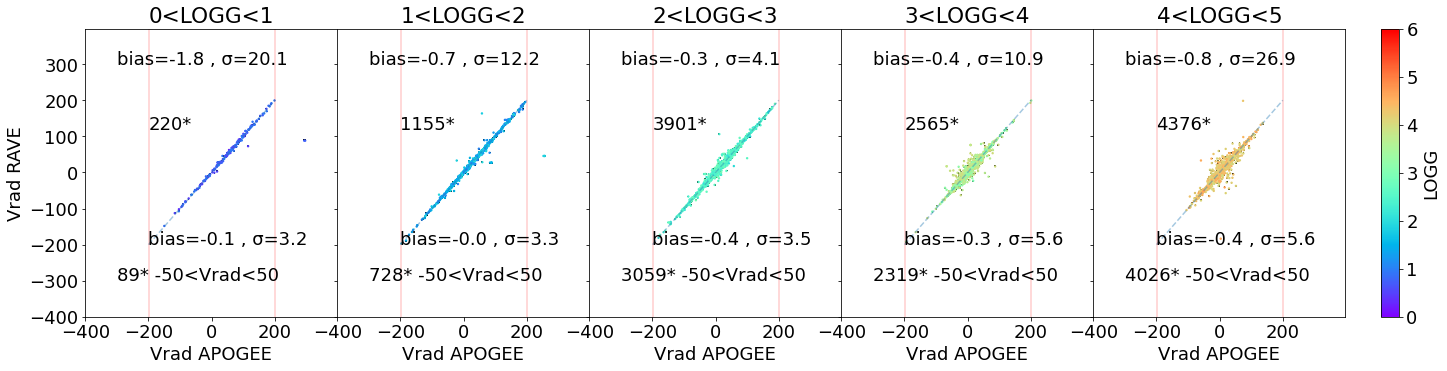

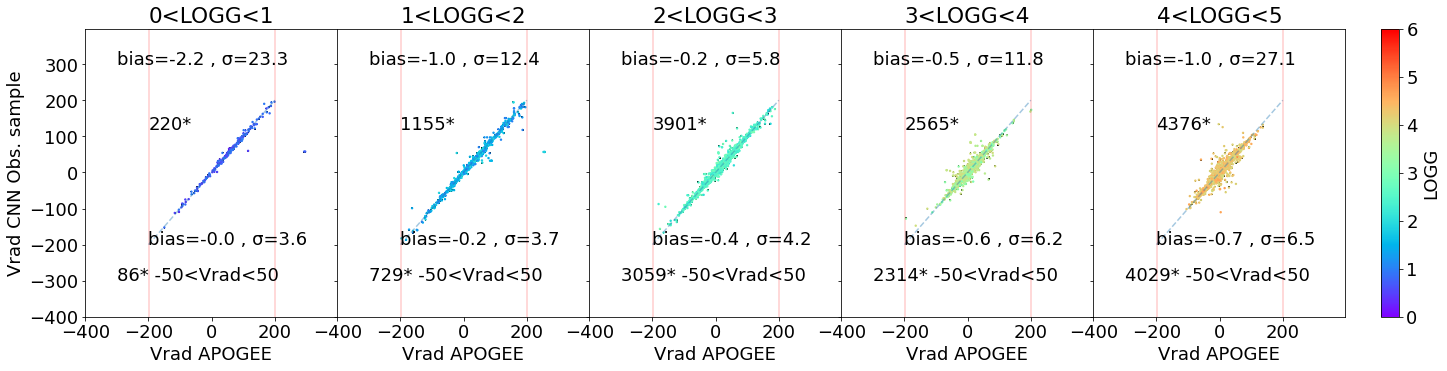

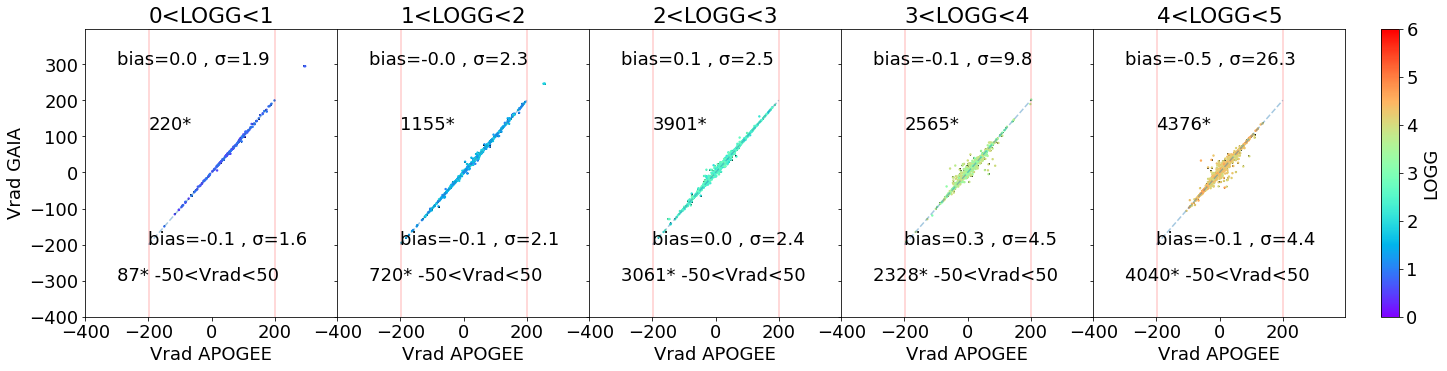

In [25]:
## plot for observed sample. i.e., comparision of Rave with APOGEE Vrad with atmospheric parameters


logg_range = np.arange(0,6,1)
print(len(logg_range))
ncols = len(logg_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (merge_rave_gaia_apogee.logg_BDASP > logg_range[i]) & (merge_rave_gaia_apogee.logg_BDASP < logg_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.HRV_SPARV[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.HRV_SPARV[w], c=merge_rave_gaia_apogee.logg_BDASP[w],s=2.0,cmap='rainbow', vmin=0,vmax=6, rasterized=True)
    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad APOGEE")
    
    if i == 0 : ax[i].set_ylabel("Vrad RAVE")
    ax[i].set_title(str(logg_range[i]) + "<LOGG<" + str(logg_range[i+1]))
    #ax[i].set_xticks([-200,-100,0,100,200])
    ax[i].text(-300,300,"bias="+str(round(np.mean(merge_rave_gaia_apogee.HRV_SPARV[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1))+" , \u03C3="+str(round(np.std(merge_rave_gaia_apogee.HRV_SPARV[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1)),color='black')  
    ax[i].text(-200,120,str(len(merge_rave_gaia_apogee.HRV_SPARV[w])) + '*',color='black')
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((merge_rave_gaia_apogee.HRV_SPARV[((merge_rave_gaia_apogee.HRV_SPARV < 50) & (merge_rave_gaia_apogee.HRV_SPARV > -50))][w])- (merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1))+" , \u03C3="+str(round(np.std((merge_rave_gaia_apogee.HRV_SPARV[((merge_rave_gaia_apogee.HRV_SPARV < 50) & (merge_rave_gaia_apogee.HRV_SPARV > -50))][w])-(merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1)),color='black')  
    ax[i].text(-300,-300,str(len(merge_rave_gaia_apogee.HRV_SPARV[((merge_rave_gaia_apogee.HRV_SPARV < 50) & (merge_rave_gaia_apogee.HRV_SPARV > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)

    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])
#cb_ax.plot(merge_rave_gaia_apogee.VHELIO_AVG[w],(merge_rave_gaia_apogee.Vrad_cnn[w] - merge_rave_gaia_apogee.VHELIO_AVG[w]))
cbar = fig.colorbar(cs, cax=cb_ax,label='LOGG')
plt.savefig("plots/"+run+"/vrad_rave_vs_apogee_LOGG.png", bbox_inches='tight')


## plot for observed sample. i.e., comparision of APOGEE_Vrad with Vrad_cnn with atmospheric parameters

logg_range = np.arange(0,6,1)
print(len(logg_range))
ncols = len(logg_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (merge_rave_gaia_apogee.logg_BDASP > logg_range[i]) & (merge_rave_gaia_apogee.logg_BDASP < logg_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.Vrad_cnn[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.Vrad_cnn[w], c=merge_rave_gaia_apogee.logg_BDASP[w],s=2.0,cmap='rainbow', vmin=0,vmax=6, rasterized=True)
    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad APOGEE")
    
    if i == 0 : ax[i].set_ylabel("Vrad CNN Obs. sample")
    ax[i].set_title(str(logg_range[i]) + "<LOGG<" + str(logg_range[i+1]))
    #ax[i].set_xticks([-200,-100,0,100,200])
    
    ax[i].text(-300,300,"bias="+str(round(np.mean(merge_rave_gaia_apogee.Vrad_cnn[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1))+" , \u03C3="+str(round(np.std(merge_rave_gaia_apogee.Vrad_cnn[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1)),color='black')  
    ax[i].text(-200,120,str(len(merge_rave_gaia_apogee.Vrad_cnn[w])) + '*',color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((merge_rave_gaia_apogee.Vrad_cnn[((merge_rave_gaia_apogee.Vrad_cnn < 50) & (merge_rave_gaia_apogee.Vrad_cnn > -50))][w])- (merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1))+" , \u03C3="+str(round(np.std((merge_rave_gaia_apogee.Vrad_cnn[((merge_rave_gaia_apogee.Vrad_cnn < 50) & (merge_rave_gaia_apogee.Vrad_cnn > -50))][w])-(merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1)),color='black')  
    ax[i].text(-300,-300,str(len(merge_rave_gaia_apogee.Vrad_cnn[((merge_rave_gaia_apogee.Vrad_cnn < 50) & (merge_rave_gaia_apogee.Vrad_cnn > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])

cbar = fig.colorbar(cs, cax=cb_ax,label='LOGG')
plt.savefig("plots/"+run+"/vrad_cnn_vs_apogee_LOGG.png", bbox_inches='tight')


## plot for observed sample. i.e., comparision of APOGEE_Vrad with Gaia_vrad with atmospheric parameters


logg_range = np.arange(0,6,1)
print(len(logg_range))
ncols = len(logg_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (merge_rave_gaia_apogee.logg_BDASP > logg_range[i]) & (merge_rave_gaia_apogee.logg_BDASP < logg_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.dr2_radial_velocity[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);

    cs=ax[i].scatter(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.dr2_radial_velocity[w], c=merge_rave_gaia_apogee.logg_BDASP[w],s=2.0,cmap='rainbow', vmin=0,vmax=6, rasterized=True)

    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad APOGEE")
    
    if i == 0 : ax[i].set_ylabel("Vrad GAIA")
    ax[i].set_title(str(logg_range[i]) + "<LOGG<" + str(logg_range[i+1]))
    #ax[i].set_xticks([-200,-100,0,100,200])
    
    ax[i].text(-300,300,"bias="+str(round(np.mean(merge_rave_gaia_apogee.dr2_radial_velocity[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1))+" , \u03C3="+str(round(np.std(merge_rave_gaia_apogee.dr2_radial_velocity[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1)),color='black')  
    ax[i].text(-200,120,str(len(merge_rave_gaia_apogee.dr2_radial_velocity[w])) + '*',color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((merge_rave_gaia_apogee.dr2_radial_velocity[((merge_rave_gaia_apogee.dr2_radial_velocity < 50) & (merge_rave_gaia_apogee.dr2_radial_velocity > -50))][w])- (merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1))+" , \u03C3="+str(round(np.std((merge_rave_gaia_apogee.dr2_radial_velocity[((merge_rave_gaia_apogee.dr2_radial_velocity < 50) & (merge_rave_gaia_apogee.dr2_radial_velocity > -50))][w])-(merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1)),color='black')  
    ax[i].text(-300,-300,str(len(merge_rave_gaia_apogee.dr2_radial_velocity[((merge_rave_gaia_apogee.dr2_radial_velocity < 50) & (merge_rave_gaia_apogee.dr2_radial_velocity > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])

cbar = fig.colorbar(cs, cax=cb_ax,label='LOGG')
plt.savefig("plots/"+run+"/gaia_vs_apogee_LOGG.png", bbox_inches='tight')

8


8


8


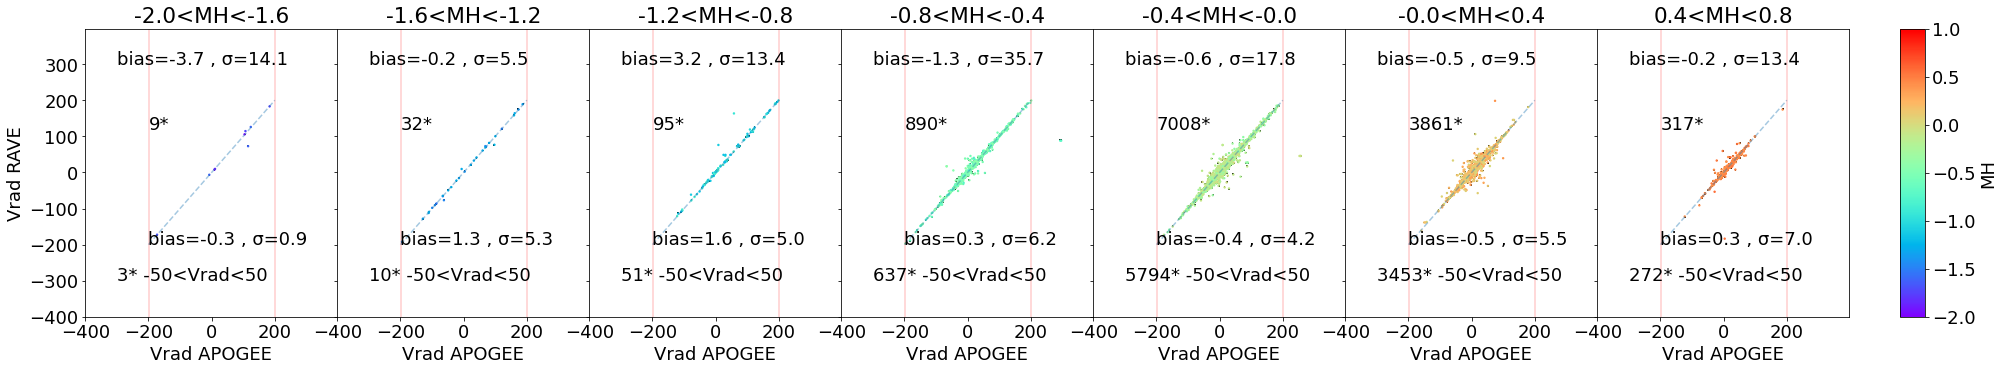

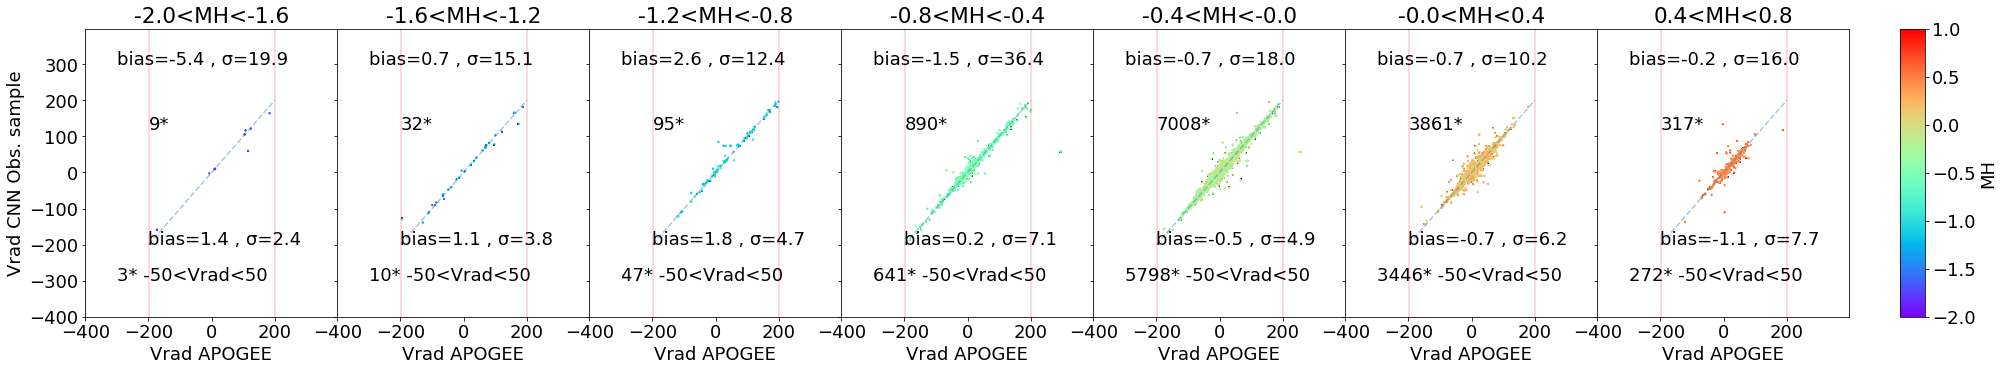

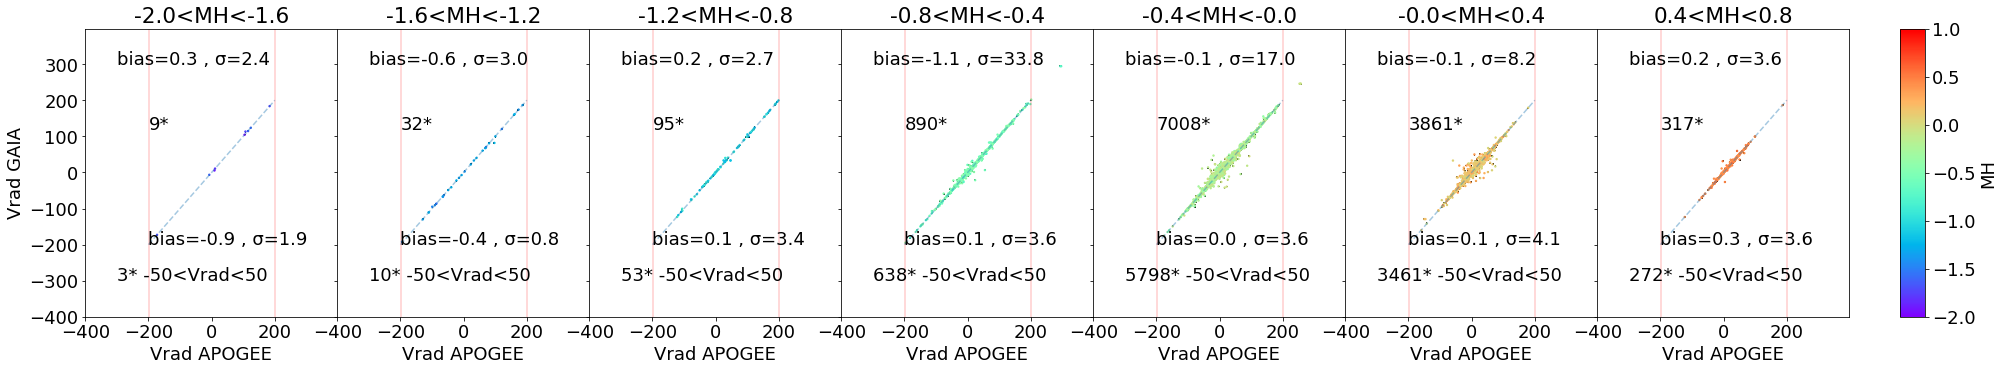

In [26]:
## plot for observed sample. i.e., comparision of Rave with APOGEE Vrad with Teff

MH_range = np.arange(-2,1,0.4)
print(len(MH_range))
ncols = len(MH_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (merge_rave_gaia_apogee.M_H_BDASP > MH_range[i]) & (merge_rave_gaia_apogee.M_H_BDASP < MH_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.HRV_SPARV[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.HRV_SPARV[w], c=merge_rave_gaia_apogee.M_H_BDASP[w],s=2.0,cmap='rainbow', vmin=-2,vmax=1, rasterized=True)

    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    
    ax[i].set_xlabel("Vrad APOGEE")
    if i == 0 : ax[i].set_ylabel("Vrad RAVE")
    ax[i].set_title(str(round(MH_range[i],1)) + "<MH<" + str(round(MH_range[i+1],1)))
    
    #ax[i].set_xticks([-200,-100,0,100,200])
    
    ax[i].text(-300,300,"bias="+str(round(np.mean(merge_rave_gaia_apogee.HRV_SPARV[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1))+" , \u03C3="+str(round(np.std(merge_rave_gaia_apogee.HRV_SPARV[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1)),color='black')  
    ax[i].text(-200,120,str(len(merge_rave_gaia_apogee.HRV_SPARV[w])) + '*',color='black')
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((merge_rave_gaia_apogee.HRV_SPARV[((merge_rave_gaia_apogee.HRV_SPARV < 50) & (merge_rave_gaia_apogee.HRV_SPARV > -50))][w])- (merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1))+" , \u03C3="+str(round(np.std((merge_rave_gaia_apogee.HRV_SPARV[((merge_rave_gaia_apogee.HRV_SPARV < 50) & (merge_rave_gaia_apogee.HRV_SPARV > -50))][w])-(merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1)),color='black')  
    ax[i].text(-300,-300,str(len(merge_rave_gaia_apogee.HRV_SPARV[((merge_rave_gaia_apogee.HRV_SPARV < 50) & (merge_rave_gaia_apogee.HRV_SPARV > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)

    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])
#cb_ax.plot(merge_rave_gaia_apogee.VHELIO_AVG[w],(merge_rave_gaia_apogee.Vrad_cnn[w] - merge_rave_gaia_apogee.VHELIO_AVG[w]))
cbar = fig.colorbar(cs, cax=cb_ax,label='MH')
plt.savefig("plots/"+run+"/vrad_rave_vs_apogee_MH.png", bbox_inches='tight')


## plot for observed sample. i.e., comparision of APOGEE_Vrad with Vrad_cnn with atmospheric parameters

MH_range = np.arange(-2,1,0.4)
print(len(MH_range))
ncols = len(MH_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (merge_rave_gaia_apogee.M_H_BDASP > MH_range[i]) & (merge_rave_gaia_apogee.M_H_BDASP < MH_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.Vrad_cnn[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.Vrad_cnn[w], c=merge_rave_gaia_apogee.M_H_BDASP[w],s=2.0,cmap='rainbow', vmin=-2,vmax=1, rasterized=True)

    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad APOGEE")
    
    if i == 0 : ax[i].set_ylabel("Vrad CNN Obs. sample")
    ax[i].set_title(str(round(MH_range[i],1)) + "<MH<" + str(round(MH_range[i+1],1)))
    #ax[i].set_xticks([-200,-100,0,100,200])
    
    ax[i].text(-300,300,"bias="+str(round(np.mean(merge_rave_gaia_apogee.Vrad_cnn[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1))+" , \u03C3="+str(round(np.std(merge_rave_gaia_apogee.Vrad_cnn[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1)),color='black')  
    ax[i].text(-200,120,str(len(merge_rave_gaia_apogee.Vrad_cnn[w])) + '*',color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((merge_rave_gaia_apogee.Vrad_cnn[((merge_rave_gaia_apogee.Vrad_cnn < 50) & (merge_rave_gaia_apogee.Vrad_cnn > -50))][w])- (merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1))+" , \u03C3="+str(round(np.std((merge_rave_gaia_apogee.Vrad_cnn[((merge_rave_gaia_apogee.Vrad_cnn < 50) & (merge_rave_gaia_apogee.Vrad_cnn > -50))][w])-(merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1)),color='black')  
    ax[i].text(-300,-300,str(len(merge_rave_gaia_apogee.Vrad_cnn[((merge_rave_gaia_apogee.Vrad_cnn < 50) & (merge_rave_gaia_apogee.Vrad_cnn > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])

cbar = fig.colorbar(cs, cax=cb_ax,label='MH')
plt.savefig("plots/"+run+"/vrad_cnn_vs_apogee_MH.png", bbox_inches='tight')


## plot for observed sample. i.e., comparision of APOGEE_Vrad with Gaia_vrad with atmospheric parameters

MH_range = np.arange(-2,1,0.4)
print(len(MH_range))
ncols = len(MH_range) - 1

plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(nrows=1, ncols=ncols, figsize=(5*ncols,5), sharey=True,sharex=True,gridspec_kw={'hspace': 0,'wspace': 0})

for i in range(ncols):
    w = (merge_rave_gaia_apogee.M_H_BDASP > MH_range[i]) & (merge_rave_gaia_apogee.M_H_BDASP < MH_range[i+1])
    ax[i].grid(color='black', linestyle='--', linewidth=2, alpha=0.5)
    ax[i].plot([-200, 200], [-200,200], linestyle='--', alpha = 0.4)
    ax[i].hist2d(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.dr2_radial_velocity[w], bins=(np.arange(-400, 400, 2),np.arange(-400, 400, 2)),cmin=1, rasterized=True, cmap=plt.cm.Greys_r, alpha=1.0);
    cs=ax[i].scatter(merge_rave_gaia_apogee.VHELIO_AVG[w], merge_rave_gaia_apogee.dr2_radial_velocity[w], c=merge_rave_gaia_apogee.M_H_BDASP[w],s=2.0,cmap='rainbow', vmin=-2,vmax=1, rasterized=True)

    
    #ax[i].set_xlim(-250, 250)
    #ax[i].set_ylim(-250, 250)
    ax[i].set_xlabel("Vrad APOGEE")
    
    if i == 0 : ax[i].set_ylabel("Vrad GAIA")
    ax[i].set_title(str(round(MH_range[i],1)) + "<MH<" + str(round(MH_range[i+1],1)))
    #ax[i].set_xticks([-200,-100,0,100,200])
    
    ax[i].text(-300,300,"bias="+str(round(np.mean(merge_rave_gaia_apogee.dr2_radial_velocity[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1))+" , \u03C3="+str(round(np.std(merge_rave_gaia_apogee.dr2_radial_velocity[w]-merge_rave_gaia_apogee.VHELIO_AVG[w]),1)),color='black')  
    ax[i].text(-200,120,str(len(merge_rave_gaia_apogee.dr2_radial_velocity[w])) + '*',color='black')
    
    ## vertical line corresponding to Vrad_max and Vrad_min of training sample
    ax[i].axvline(Vrad_min_train, color="red", alpha=0.2)
    ax[i].axvline(Vrad_max_train, color="red", alpha=0.2)
    
    ax[i].text(-200,-200,"bias="+str(round(np.mean((merge_rave_gaia_apogee.dr2_radial_velocity[((merge_rave_gaia_apogee.dr2_radial_velocity < 50) & (merge_rave_gaia_apogee.dr2_radial_velocity > -50))][w])- (merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1))+" , \u03C3="+str(round(np.std((merge_rave_gaia_apogee.dr2_radial_velocity[((merge_rave_gaia_apogee.dr2_radial_velocity < 50) & (merge_rave_gaia_apogee.dr2_radial_velocity > -50))][w])-(merge_rave_gaia_apogee.VHELIO_AVG[((merge_rave_gaia_apogee.VHELIO_AVG < 50) & (merge_rave_gaia_apogee.VHELIO_AVG > -50))][w])),1)),color='black')  
    ax[i].text(-300,-300,str(len(merge_rave_gaia_apogee.dr2_radial_velocity[((merge_rave_gaia_apogee.dr2_radial_velocity < 50) & (merge_rave_gaia_apogee.dr2_radial_velocity > -50))][w])) + '* '+ '-50<Vrad<50' ,color='black')
    
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)
cb_ax = fig.add_axes([0.82, 0.1, 0.01, 0.8])

cbar = fig.colorbar(cs, cax=cb_ax,label='MH')
plt.savefig("plots/"+run+"/gaia_vs_apogee_MH.png", bbox_inches='tight')

### RUNNING MEAN AND BIAS 

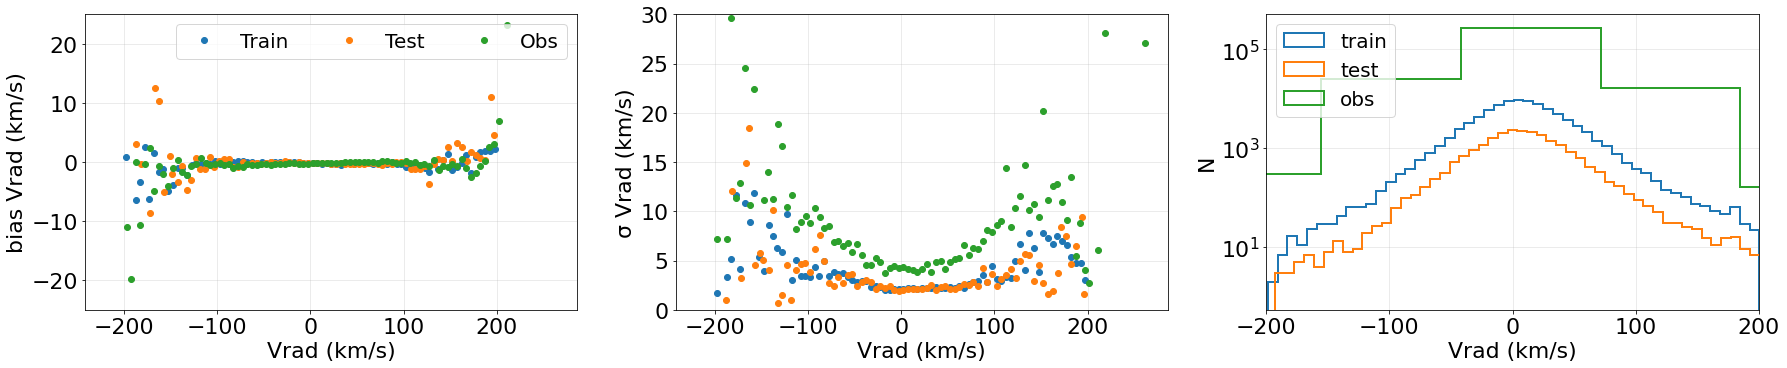

In [27]:
fig=plt.figure(figsize=(30,25))
plt.rcParams.update({'font.size': 22})

stepp = 5.0
interv = np.arange(-300, 300, stepp)

xxx_train = []
sig_train = []
bia_train = []
for i in interv:       # TRAINING SAMPLE
    www = (df_res_train.Vrad > i) & (df_res_train.Vrad < i+stepp)
    if(len(df_res_train.Vrad[www]) > 1):
        sige = np.std(df_res_train.Vrad[www]  - df_res_train.Vrad_ref[www])           # compute stdev
        bias = np.mean(df_res_train.Vrad[www] - df_res_train.Vrad_ref[www])           # compute bias
        xxx_train.append(np.mean(df_res_train.Vrad[www]))
        sig_train.append(sige)
        bia_train.append(bias)

xxx_test = []
sig_test = []
bia_test = []
for i in interv:       # TEST SAMPLE
    www = (df_res_test.Vrad > i) & (df_res_test.Vrad < i+stepp)
    if(len(df_res_test.Vrad[www]) > 1):
        sige = np.std(df_res_test.Vrad[www]  - df_res_test.Vrad_ref[www])           # compute stdev
        bias = np.mean(df_res_test.Vrad[www] - df_res_test.Vrad_ref[www])           # compute bias
        xxx_test.append(np.mean(df_res_test.Vrad[www]))
        sig_test.append(sige)
        bia_test.append(bias)

xxx_obs = []
sig_obs = []
bia_obs = []
for i in interv:       # OBS SAMPLE
    www = (df_res_obs.Vrad > i) & (df_res_obs.Vrad < i+stepp)
    if(len(df_res_obs.Vrad[www]) > 1):
        sige = np.std(df_res_obs.Vrad[www]   - alle.HRV_SPARV[www])           # compute stdev
        bias = np.mean(df_res_obs.Vrad[www]  - alle.HRV_SPARV[www])           # compute bias
        xxx_obs.append(np.mean(df_res_obs.Vrad[www]))
        sig_obs.append(sige)
        bia_obs.append(bias)

ax=fig.add_subplot(4,3,1)
ax.plot(xxx_train, bia_train, 'o', c='C0');
ax.plot(xxx_test,  bia_test,  'o', c='C1');
ax.plot(xxx_obs,   bia_obs,   'o', c='C2');
ax.grid(alpha=0.3)
ax.set_xlabel("Vrad (km/s)");
ax.set_ylabel("bias Vrad (km/s)")
ax.legend(["Train", "Test", "Obs"], loc='upper right', ncol=3, fontsize=20)#, bbox_to_anchor=(1.05, 1))
ax.set_ylim([-25, 25])

ax=fig.add_subplot(4,3,2)
ax.plot(xxx_train, sig_train, 'o', c='C0');
ax.plot(xxx_test,  sig_test,  'o', c='C1');
ax.plot(xxx_obs,   sig_obs,   'o', c='C2');
ax.grid(alpha=0.3)
ax.set_xlabel("Vrad (km/s)")
ax.set_ylabel("\u03C3 Vrad (km/s)")
ax.set_ylim([0.0, 30])

ax=fig.add_subplot(4,3,3)
ax.grid(alpha=0.3)
df_res_train.Vrad.hist(ax=ax, histtype='step', lw=2.0, bins=50, color='C0',log=True)#, density=1)
df_res_test.Vrad.hist(ax=ax,  histtype='step', lw=2.0, bins=50, color='C1',log=True)#, density=1)
df_res_obs.Vrad.hist(ax=ax,   histtype='step', lw=2.0, bins=50, color='C2',log=True)#, density=1)
ax.set_xlabel("Vrad (km/s)");
ax.set_ylabel("N")
ax.set_xlim(-200,200)
ax.legend(["train", "test","obs"], loc='upper left', fontsize=20)

#### Running mean and bias for CNN-RAVE, RAVE-CNN, CNN-GAIA

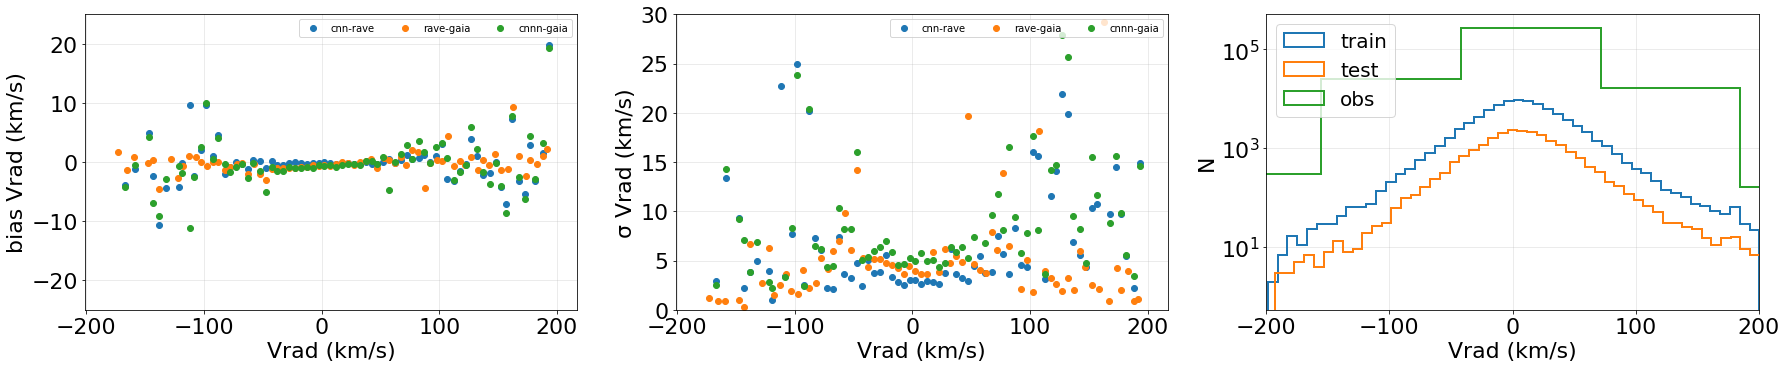

In [28]:
fig=plt.figure(figsize=(30,25))
plt.rcParams.update({'font.size': 22})

stepp = 5.0
interv = np.arange(-300, 300, stepp)

xxx_cnn_rave = []
sig_cnn_rave = []
bia_cnn_rave = []
for i in interv:       # CNN-Rave
    www = (merge_rave_gaia_apogee.Vrad_cnn > i) & (merge_rave_gaia_apogee.Vrad_cnn < i+stepp)
    if(len(merge_rave_gaia_apogee.Vrad_cnn[www]) > 1):
        sige = np.std(merge_rave_gaia_apogee.Vrad_cnn[www]  - merge_rave_gaia_apogee.HRV_SPARV[www])           # compute stdev
        bias = np.mean(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.HRV_SPARV[www])           # compute bias
        xxx_cnn_rave.append(np.mean(merge_rave_gaia_apogee.Vrad_cnn[www]))
        sig_cnn_rave.append(sige)
        bia_cnn_rave.append(bias)

xxx_rave_gaia = []
sig_rave_gaia = []
bia_rave_gaia = []
for i in interv:       # Rave-Gaia
    www = (merge_rave_gaia_apogee.HRV_SPARV > i) & (merge_rave_gaia_apogee.HRV_SPARV < i+stepp)
    if(len(merge_rave_gaia_apogee.HRV_SPARV[www]) > 1):
        sige = np.std(merge_rave_gaia_apogee.HRV_SPARV[www]  - merge_rave_gaia_apogee.dr2_radial_velocity[www])           # compute stdev
        bias = np.mean(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.dr2_radial_velocity[www])           # compute bias
        xxx_rave_gaia.append(np.mean(merge_rave_gaia_apogee.HRV_SPARV[www]))
        sig_rave_gaia.append(sige)
        bia_rave_gaia.append(bias)

xxx_cnn_gaia = []
sig_cnn_gaia = []
bia_cnn_gaia = []
for i in interv:       # CNN-Gaia
    www = (merge_rave_gaia_apogee.Vrad_cnn > i) & (merge_rave_gaia_apogee.Vrad_cnn < i+stepp)
    if(len(merge_rave_gaia_apogee.Vrad_cnn[www]) > 1):
        sige = np.std(merge_rave_gaia_apogee.Vrad_cnn[www]   - merge_rave_gaia_apogee.dr2_radial_velocity[www])           # compute stdev
        bias = np.mean(merge_rave_gaia_apogee.Vrad_cnn[www]  - merge_rave_gaia_apogee.dr2_radial_velocity[www])           # compute bias
        xxx_cnn_gaia.append(np.mean(merge_rave_gaia_apogee.Vrad_cnn[www]))
        sig_cnn_gaia.append(sige)
        bia_cnn_gaia.append(bias)

ax=fig.add_subplot(4,3,1)
ax.plot(xxx_cnn_rave, bia_cnn_rave, 'o', c='C0');
ax.plot(xxx_rave_gaia,  bia_rave_gaia,  'o', c='C1');
ax.plot(xxx_cnn_gaia,   bia_cnn_gaia,   'o', c='C2');
ax.grid(alpha=0.3)
ax.set_xlabel("Vrad (km/s)");
ax.set_ylabel("bias Vrad (km/s)")
ax.legend(["cnn-rave", "rave-gaia", "cnnn-gaia"], loc='upper right', ncol=3, fontsize=10)#, bbox_to_anchor=(1.05, 1))
ax.set_ylim([-25, 25])

ax=fig.add_subplot(4,3,2)
ax.plot(xxx_cnn_rave, sig_cnn_rave, 'o', c='C0');
ax.plot(xxx_rave_gaia,  sig_rave_gaia,  'o', c='C1');
ax.plot(xxx_cnn_gaia,   sig_cnn_gaia,   'o', c='C2');
ax.grid(alpha=0.3)
ax.set_xlabel("Vrad (km/s)")
ax.set_ylabel("\u03C3 Vrad (km/s)")
ax.legend(["cnn-rave", "rave-gaia", "cnnn-gaia"], loc='upper right', ncol=3, fontsize=10)#, bbox_to_anchor=(1.05, 1))
ax.set_ylim([0.0, 30])

ax=fig.add_subplot(4,3,3)
ax.grid(alpha=0.3)
df_res_train.Vrad.hist(ax=ax, histtype='step', lw=2.0, bins=50, color='C0',log=True)#, density=1)
df_res_test.Vrad.hist(ax=ax,  histtype='step', lw=2.0, bins=50, color='C1',log=True)#, density=1)
df_res_obs.Vrad.hist(ax=ax,   histtype='step', lw=2.0, bins=50, color='C2',log=True)#, density=1)
ax.set_xlabel("Vrad (km/s)");
ax.set_ylabel("N")
ax.set_xlim(-200,200)
ax.legend(["train", "test","obs"], loc='upper left', fontsize=20)

#### Running mean and bias for  CNN-APOGEE, RAVE-APOGEE, Gaia-APOGEE

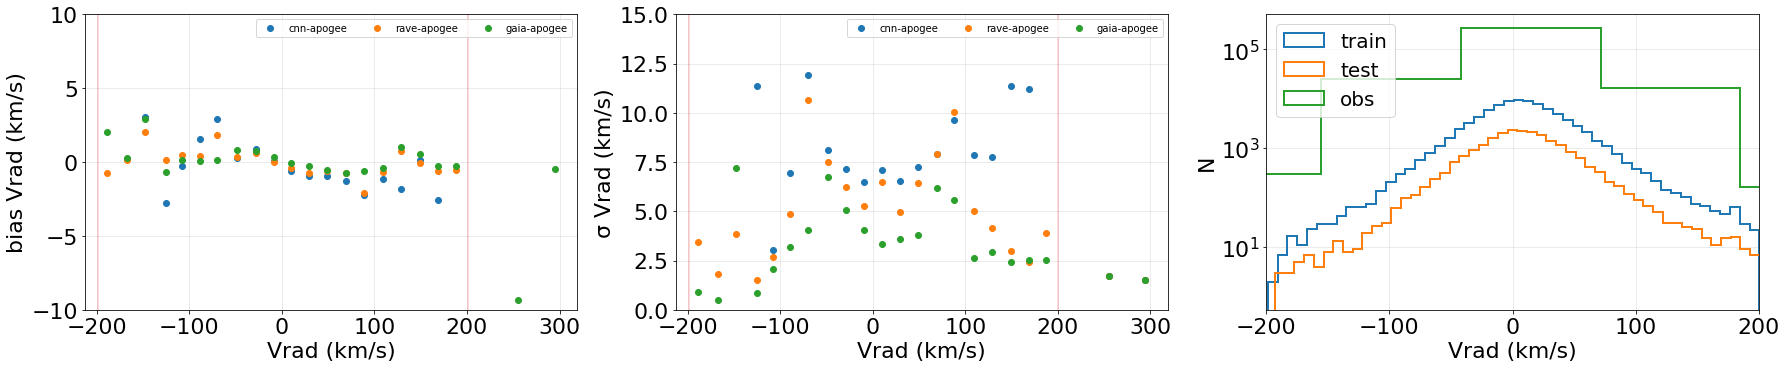

In [29]:
fig=plt.figure(figsize=(30,25))
plt.rcParams.update({'font.size': 22})

stepp = 20.0
interv = np.arange(-300, 300, stepp)

xxx_cnn_apogee = []
sig_cnn_apogee = []
bia_cnn_apogee = []
for i in interv:       # CNN-APOGEE
    www = (merge_rave_gaia_apogee.VHELIO_AVG > i) & (merge_rave_gaia_apogee.VHELIO_AVG < i+stepp)
    if(len(merge_rave_gaia_apogee.VHELIO_AVG[www]) > 1):
        sige = np.std(merge_rave_gaia_apogee.Vrad_cnn[www]  - merge_rave_gaia_apogee.VHELIO_AVG[www])           # compute stdev
        bias = np.mean(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www])           # compute bias
        xxx_cnn_apogee.append(np.mean(merge_rave_gaia_apogee.VHELIO_AVG[www])) #x-axis for apogee
        sig_cnn_apogee.append(sige)
        bia_cnn_apogee.append(bias)

xxx_rave_apogee = []
sig_rave_apogee = []
bia_rave_apogee = []
for i in interv:       # RAVE-APOGEE
    www = (merge_rave_gaia_apogee.VHELIO_AVG > i) & (merge_rave_gaia_apogee.VHELIO_AVG < i+stepp)
    if(len(merge_rave_gaia_apogee.VHELIO_AVG[www]) > 1):
        sige = np.std(merge_rave_gaia_apogee.HRV_SPARV[www]  - merge_rave_gaia_apogee.VHELIO_AVG[www])           # compute stdev
        bias = np.mean(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www])           # compute bias
        xxx_rave_apogee.append(np.mean(merge_rave_gaia_apogee.VHELIO_AVG[www]))
        sig_rave_apogee.append(sige)
        bia_rave_apogee.append(bias)

xxx_gaia_apogee = []
sig_gaia_apogee = []
bia_gaia_apogee = []
for i in interv:       # GAIA-APOGEE
    www = (merge_rave_gaia_apogee.VHELIO_AVG > i) & (merge_rave_gaia_apogee.VHELIO_AVG < i+stepp)
    if(len(merge_rave_gaia_apogee.VHELIO_AVG[www]) > 1):
        sige = np.std(merge_rave_gaia_apogee.dr2_radial_velocity[www]   - merge_rave_gaia_apogee.VHELIO_AVG[www])           # compute stdev
        bias = np.mean(merge_rave_gaia_apogee.dr2_radial_velocity[www]  - merge_rave_gaia_apogee.VHELIO_AVG[www])           # compute bias
        xxx_gaia_apogee.append(np.mean(merge_rave_gaia_apogee.VHELIO_AVG[www]))
        sig_gaia_apogee.append(sige)
        bia_gaia_apogee.append(bias)

ax=fig.add_subplot(4,3,1)
ax.plot(xxx_cnn_apogee, bia_cnn_apogee, 'o', c='C0');
ax.plot(xxx_rave_apogee,  bia_rave_apogee,  'o', c='C1');
ax.plot(xxx_gaia_apogee,   bia_gaia_apogee,   'o', c='C2');
ax.grid(alpha=0.3)
ax.set_xlabel("Vrad (km/s)");
ax.set_ylabel("bias Vrad (km/s)")
ax.legend(["cnn-apogee", "rave-apogee", "gaia-apogee"], loc='upper right', ncol=3, fontsize=10)#, bbox_to_anchor=(1.05, 1))
ax.set_ylim([-10, 10])
ax.axvline(Vrad_min_train, color="red", alpha=0.2)
ax.axvline(Vrad_max_train, color="red", alpha=0.2)


ax=fig.add_subplot(4,3,2)
ax.plot(xxx_cnn_apogee, sig_cnn_apogee, 'o', c='C0');
ax.plot(xxx_rave_apogee,  sig_rave_apogee,  'o', c='C1');
ax.plot(xxx_gaia_apogee,   sig_gaia_apogee,   'o', c='C2');
ax.grid(alpha=0.3)
ax.set_xlabel("Vrad (km/s)")
ax.set_ylabel("\u03C3 Vrad (km/s)")
ax.legend(["cnn-apogee", "rave-apogee", "gaia-apogee"], loc='upper right', ncol=3, fontsize=10)#, bbox_to_anchor=(1.05, 1))
ax.set_ylim([0.0, 15])
ax.axvline(Vrad_min_train, color="red", alpha=0.2)
ax.axvline(Vrad_max_train, color="red", alpha=0.2)

ax=fig.add_subplot(4,3,3)
ax.grid(alpha=0.3)
df_res_train.Vrad.hist(ax=ax, histtype='step', lw=2.0, bins=50, color='C0',log=True)#, density=1)
df_res_test.Vrad.hist(ax=ax,  histtype='step', lw=2.0, bins=50, color='C1',log=True)#, density=1)
df_res_obs.Vrad.hist(ax=ax,   histtype='step', lw=2.0, bins=50, color='C2',log=True)#, density=1)
ax.set_xlabel("Vrad (km/s)");
ax.set_ylabel("N")
ax.set_xlim(-200,200)
ax.legend(["train", "test","obs"], loc='upper left', fontsize=20)

In [30]:
tt = merge_rave_gaia_apogee.Vrad_cnn - merge_rave_gaia_apogee.VHELIO_AVG

In [31]:
sel = ((tt>-100) & (tt<100))

In [32]:
merge_rave_gaia_apogee = merge_rave_gaia_apogee[sel]

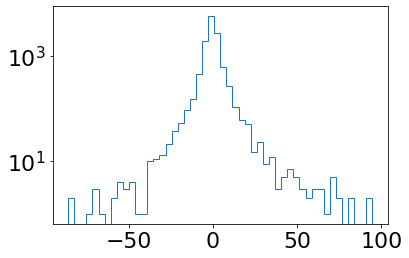

In [33]:
plt.hist(merge_rave_gaia_apogee.Vrad_cnn - merge_rave_gaia_apogee.VHELIO_AVG, bins= 50, histtype='step', log=True);

#### Vrad_CNN - Vrad_APOGEE with bins of T_eff

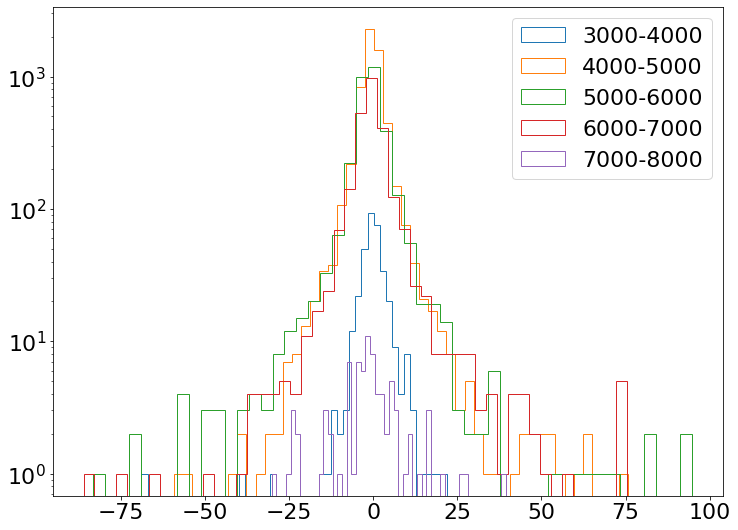

In [34]:
plt.figure(figsize=(12,9))
www = (merge_rave_gaia_apogee.Teff_BDASP >3000) & (merge_rave_gaia_apogee.Teff_BDASP <4000)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='3000-4000', log=True);

www = (merge_rave_gaia_apogee.Teff_BDASP >4000) & (merge_rave_gaia_apogee.Teff_BDASP <5000)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step',label='4000-5000', log=True);

www = (merge_rave_gaia_apogee.Teff_BDASP >5000) & (merge_rave_gaia_apogee.Teff_BDASP <6000)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='5000-6000', log=True);

www = (merge_rave_gaia_apogee.Teff_BDASP >6000) & (merge_rave_gaia_apogee.Teff_BDASP <7000)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step',label='6000-7000', log=True);

www = (merge_rave_gaia_apogee.Teff_BDASP >7000) & (merge_rave_gaia_apogee.Teff_BDASP <8000)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step',label='7000-8000', log=True);

plt.legend()
#plt.xlim(-50,50)
plt.savefig("plots/"+run+"/vrad_cnn_apogee_teff.png", bbox_inches='tight')

#### Vrad_RAVE - Vrad_APOGEE with bins of T_eff

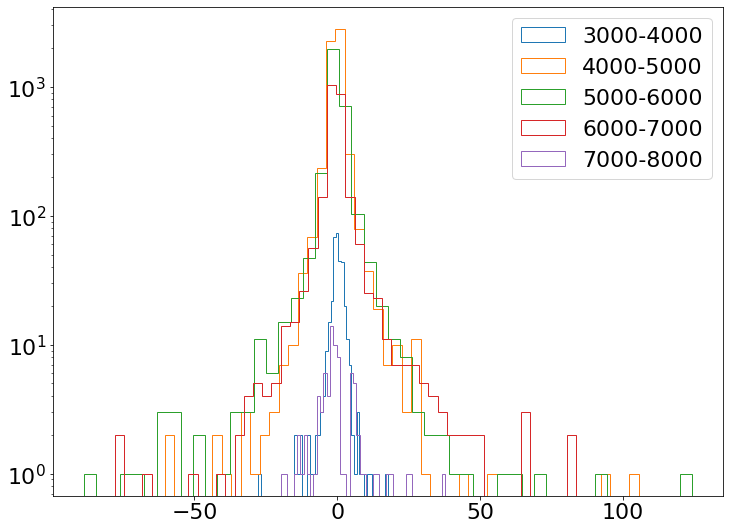

In [35]:
plt.figure(figsize=(12,9))
www = (merge_rave_gaia_apogee.Teff_BDASP >3000) & (merge_rave_gaia_apogee.Teff_BDASP <4000)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='3000-4000', log=True);

www = (merge_rave_gaia_apogee.Teff_BDASP >4000) & (merge_rave_gaia_apogee.Teff_BDASP <5000)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step',label='4000-5000', log=True);

www = (merge_rave_gaia_apogee.Teff_BDASP >5000) & (merge_rave_gaia_apogee.Teff_BDASP <6000)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='5000-6000', log=True);

www = (merge_rave_gaia_apogee.Teff_BDASP >6000) & (merge_rave_gaia_apogee.Teff_BDASP <7000)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step',label='6000-7000', log=True);

www = (merge_rave_gaia_apogee.Teff_BDASP >7000) & (merge_rave_gaia_apogee.Teff_BDASP <8000)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step',label='7000-8000', log=True);

plt.legend()
plt.savefig("plots/"+run+"/vrad_rave_apogee_teff.png", bbox_inches='tight')

#### Vrad_GAIA - Vrad_APOGEE with bins of T_eff

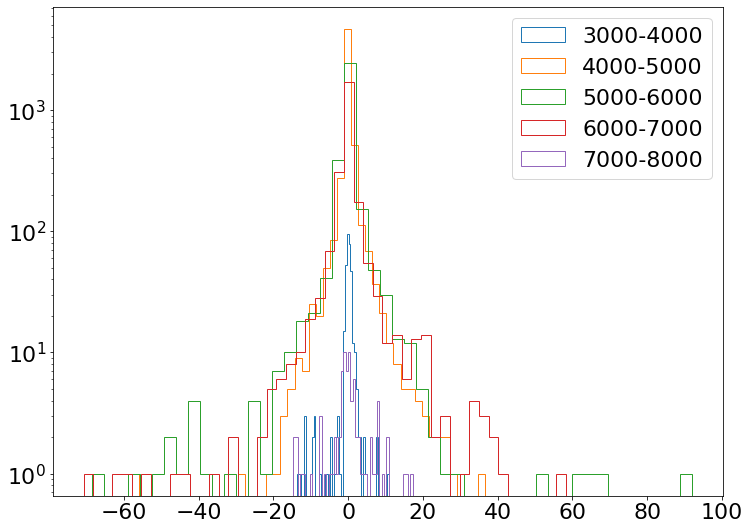

In [36]:
plt.figure(figsize=(12,9))
www = (merge_rave_gaia_apogee.Teff_BDASP >3000) & (merge_rave_gaia_apogee.Teff_BDASP <4000)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='3000-4000', log=True);

www = (merge_rave_gaia_apogee.Teff_BDASP >4000) & (merge_rave_gaia_apogee.Teff_BDASP <5000)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step',label='4000-5000', log=True);

www = (merge_rave_gaia_apogee.Teff_BDASP >5000) & (merge_rave_gaia_apogee.Teff_BDASP <6000)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='5000-6000', log=True);

www = (merge_rave_gaia_apogee.Teff_BDASP >6000) & (merge_rave_gaia_apogee.Teff_BDASP <7000)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step',label='6000-7000', log=True);

www = (merge_rave_gaia_apogee.Teff_BDASP >7000) & (merge_rave_gaia_apogee.Teff_BDASP <8000)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step',label='7000-8000', log=True);

plt.legend()
plt.savefig("plots/"+run+"/vrad_gaia_apogee_teff.png", bbox_inches='tight')

#### Vrad_CNN - Vrad_APOGEE with bins of LOG_G

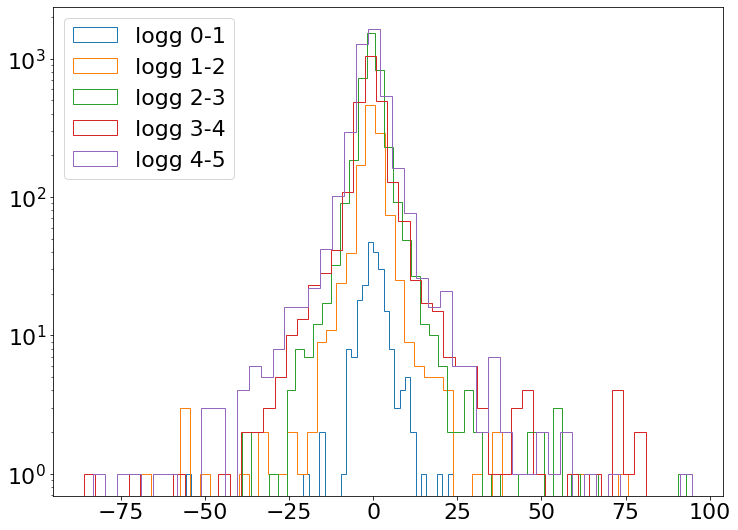

In [37]:
plt.figure(figsize = (12,9))

www = (merge_rave_gaia_apogee.logg_BDASP >0) & (merge_rave_gaia_apogee.logg_BDASP <1)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='logg 0-1', log=True);

www = (merge_rave_gaia_apogee.logg_BDASP >1) & (merge_rave_gaia_apogee.logg_BDASP <2)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step',label='logg 1-2', log=True);

www = (merge_rave_gaia_apogee.logg_BDASP >2) & (merge_rave_gaia_apogee.logg_BDASP <3)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='logg 2-3', log=True);

www = (merge_rave_gaia_apogee.logg_BDASP >3) & (merge_rave_gaia_apogee.logg_BDASP <4)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='logg 3-4', log=True);

www = (merge_rave_gaia_apogee.logg_BDASP >4) & (merge_rave_gaia_apogee.logg_BDASP <5)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='logg 4-5', log=True);

plt.legend()
plt.savefig("plots/"+run+"/vrad_cnn_apogee_logg.png", bbox_inches='tight')

#### Vrad_RAVE - Vrad_APOGEE with bins of LOG_G

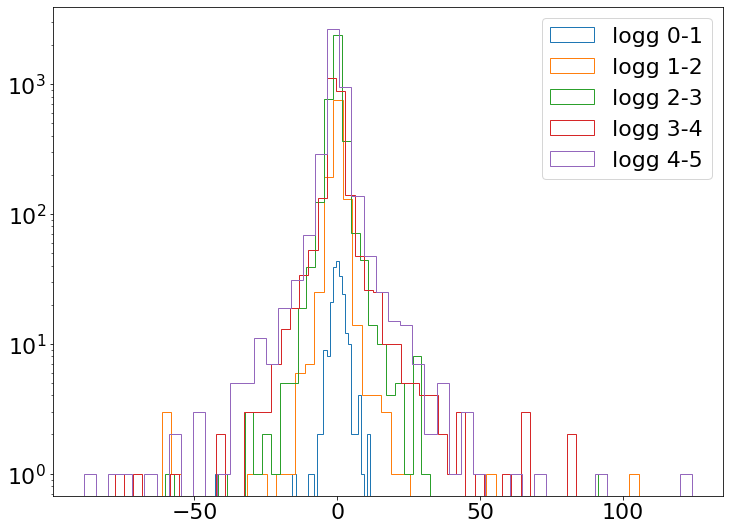

In [38]:
plt.figure(figsize = (12,9))

www = (merge_rave_gaia_apogee.logg_BDASP >0) & (merge_rave_gaia_apogee.logg_BDASP <1)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='logg 0-1', log=True);

www = (merge_rave_gaia_apogee.logg_BDASP >1) & (merge_rave_gaia_apogee.logg_BDASP <2)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step',label='logg 1-2', log=True);

www = (merge_rave_gaia_apogee.logg_BDASP >2) & (merge_rave_gaia_apogee.logg_BDASP <3)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='logg 2-3', log=True);

www = (merge_rave_gaia_apogee.logg_BDASP >3) & (merge_rave_gaia_apogee.logg_BDASP <4)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='logg 3-4', log=True);

www = (merge_rave_gaia_apogee.logg_BDASP >4) & (merge_rave_gaia_apogee.logg_BDASP <5)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='logg 4-5', log=True);

plt.legend()
plt.savefig("plots/"+run+"/vrad_rave_apogee_logg.png", bbox_inches='tight')

#### Vrad_GAIA - Vrad_APOGEE with bins of LOG_G

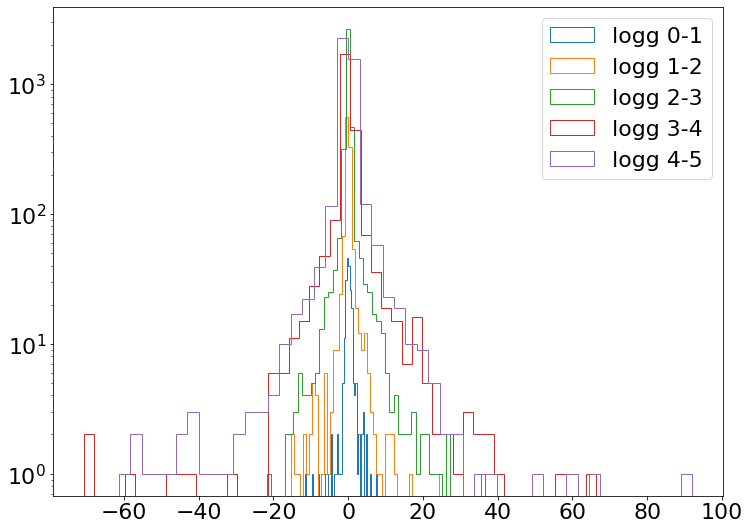

In [39]:
plt.figure(figsize = (12,9))

www = (merge_rave_gaia_apogee.logg_BDASP >0) & (merge_rave_gaia_apogee.logg_BDASP <1)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='logg 0-1', log=True);

www = (merge_rave_gaia_apogee.logg_BDASP >1) & (merge_rave_gaia_apogee.logg_BDASP <2)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step',label='logg 1-2', log=True);

www = (merge_rave_gaia_apogee.logg_BDASP >2) & (merge_rave_gaia_apogee.logg_BDASP <3)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='logg 2-3', log=True);

www = (merge_rave_gaia_apogee.logg_BDASP >3) & (merge_rave_gaia_apogee.logg_BDASP <4)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='logg 3-4', log=True);

www = (merge_rave_gaia_apogee.logg_BDASP >4) & (merge_rave_gaia_apogee.logg_BDASP <5)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label='logg 4-5', log=True);

plt.legend()
plt.savefig("plots/"+run+"/vrad_gaia_apogee_logg.png", bbox_inches='tight')

#### Vrad_CNN - Vrad_APOGEE with bins of M_H

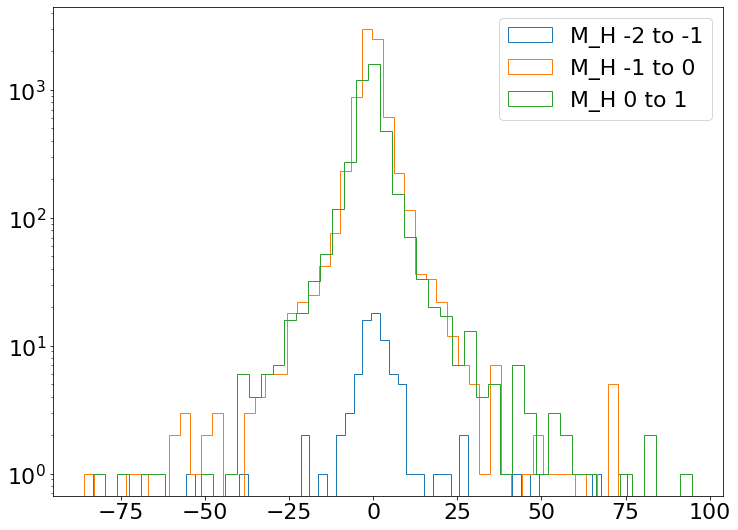

In [40]:
plt.figure(figsize=(12,9))

www = (merge_rave_gaia_apogee.M_H_BDASP >-2.0) & (merge_rave_gaia_apogee.M_H_BDASP<-1)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label = 'M_H -2 to -1', log=True);

www = (merge_rave_gaia_apogee.M_H_BDASP >-1.0) & (merge_rave_gaia_apogee.M_H_BDASP<0)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label = 'M_H -1 to 0', log=True);

www = (merge_rave_gaia_apogee.M_H_BDASP >0) & (merge_rave_gaia_apogee.M_H_BDASP<1)
plt.hist(merge_rave_gaia_apogee.Vrad_cnn[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label = 'M_H 0 to 1', log=True);

plt.legend()
plt.savefig("plots/"+run+"/vrad_cnn_apogee_MH.png", bbox_inches='tight')

#### Vrad_RAVE - Vrad_APOGEE with bins of M_H

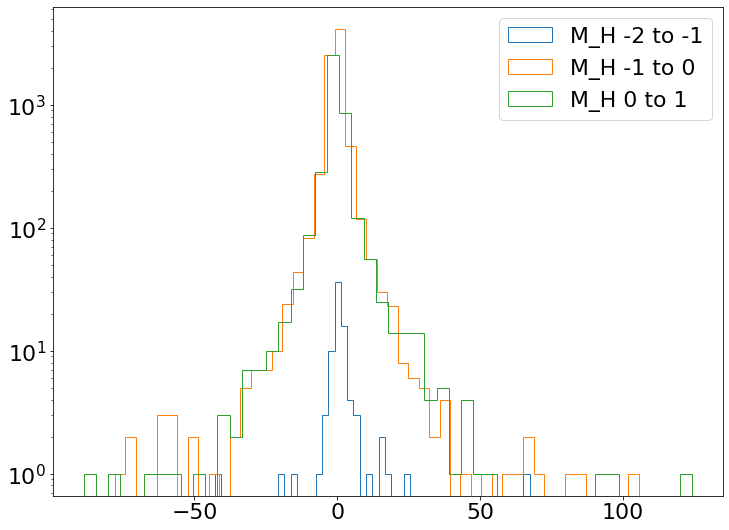

In [41]:
plt.figure(figsize=(12,9))

www = (merge_rave_gaia_apogee.M_H_BDASP >-2.0) & (merge_rave_gaia_apogee.M_H_BDASP<-1)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label = 'M_H -2 to -1', log=True);

www = (merge_rave_gaia_apogee.M_H_BDASP >-1.0) & (merge_rave_gaia_apogee.M_H_BDASP<0)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label = 'M_H -1 to 0', log=True);

www = (merge_rave_gaia_apogee.M_H_BDASP >0) & (merge_rave_gaia_apogee.M_H_BDASP<1)
plt.hist(merge_rave_gaia_apogee.HRV_SPARV[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label = 'M_H 0 to 1', log=True);

plt.legend()
plt.savefig("plots/"+run+"/vrad_rave_apogee_MH.png", bbox_inches='tight')

#### Vrad_GAIA - Vrad_APOGEE with bins of M_H

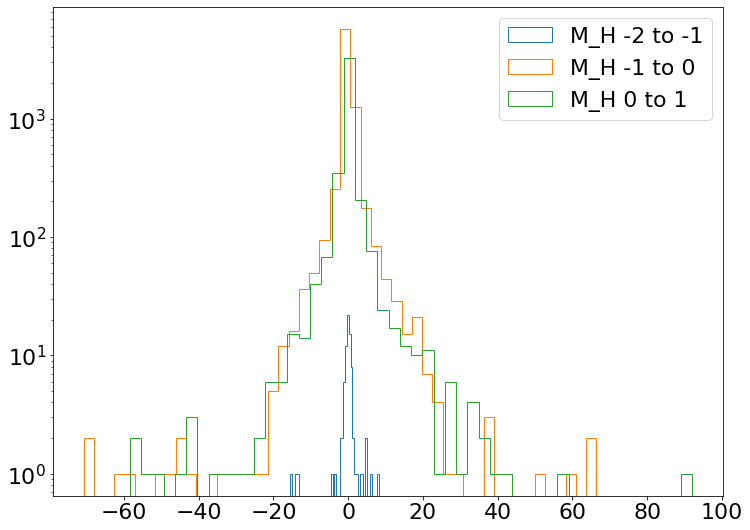

In [42]:
plt.figure(figsize=(12,9))

www = (merge_rave_gaia_apogee.M_H_BDASP >-2.0) & (merge_rave_gaia_apogee.M_H_BDASP<-1)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label = 'M_H -2 to -1', log=True);

www = (merge_rave_gaia_apogee.M_H_BDASP >-1.0) & (merge_rave_gaia_apogee.M_H_BDASP<0)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label = 'M_H -1 to 0', log=True);

www = (merge_rave_gaia_apogee.M_H_BDASP >0) & (merge_rave_gaia_apogee.M_H_BDASP<1)
plt.hist(merge_rave_gaia_apogee.dr2_radial_velocity[www] - merge_rave_gaia_apogee.VHELIO_AVG[www], bins=50, histtype='step', label = 'M_H 0 to 1', log=True);

plt.legend()
plt.savefig("plots/"+run+"/vrad_gaia_apogee_MH.png", bbox_inches='tight')